## Exploratory Data Analysis  - 
### Mahindra First Choice Services

Mahindra First Choice Services (MFCS) is a company of Mahindra Group and is India’s leading
chain of multi-brand car workshops with over 335+ workshops present in 267+ towns & 24
states. It has serviced over 10,50,000 cars. The company aims to establish countrywide network
of over 400 workshops by March 2018.

Geolocation Based Customer Analysis:
The idea is to explore how various factors like car make & model, time and type of service etc.
vary with location. Since the servicing industry is local in nature, this kind of an analysis could
possibly render some really interesting business insights.

In [1]:
# Loading Customer Data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_invoice = pd.read_csv("Final_invoice.csv")

C:\Users\10659892\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_invoice.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,0.0,52.95,400607,BC01,THANE,NaN,NO,0.0,AP09AX0582,0.0,0.0,0.0,0.0,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,0.0,944.16,400603,BC01,THANE,NaN,NO,0.0,MH04CD9768,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [6]:
df = df_invoice.copy()

In [7]:
# !pip install chart_studio

In [8]:
#!pip install cufflinks

## EDA - Business Insights

In [9]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import warnings
warnings.filterwarnings("ignore")
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import datetime
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
from sklearn.preprocessing import LabelEncoder
from bokeh.io import output_file, show
from bokeh.plotting import figure
from sklearn.preprocessing import scale

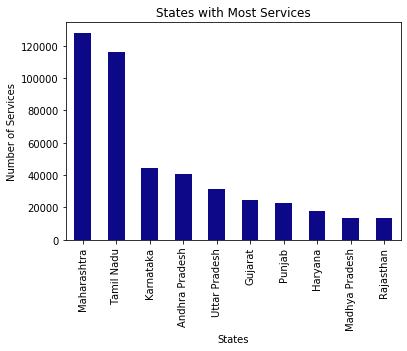

In [10]:
df['District'].value_counts().head(10).plot(kind='bar', colormap='plasma')
plt.title("States with Most Services")
plt.ylabel("Number of Services")
plt.xlabel("States")
plt.show()

In [11]:
df.groupby(['Make','Model'], sort=False).size().unstack().iplot(kind='bar',barmode='stack', xTitle='State', yTitle='No. of Cars Serviced')

### 1. Make (Profit) Revenue to Time ratio for each service.

In [12]:
pd.options.display.float_format = '{:.2f}'.format

In [13]:
revenues = (df.groupby(['Order Type'])['Total Amt Wtd Tax.'].sum())/100000
print ("Revenues in Lacs\n",revenues)

Revenues in Lacs
 Order Type
Accidental          7554.65
Mechanical           474.56
Paid Service        6451.71
Repeat Order           0.04
Running Repairs     6787.32
SMC Redemption        16.74
SMC Value Package    350.80
WBW Order              1.31
Workshop Damage        0.00
Name: Total Amt Wtd Tax., dtype: float64


In [14]:
df['Invoice_DateTime'] = pd.to_datetime(df['Invoice Date'] + ' ' + df['Invoice Time'])

In [15]:
df['JobCard_DateTime'] = pd.to_datetime(df['JobCard Date'] + ' ' + df['JobCard Time'])

In [16]:
df['Service Time']=df['Invoice_DateTime'].sub(df['JobCard_DateTime'], axis=0)

In [17]:
df['Service Hour'] = df['Service Time'].apply(lambda x : (x.days * 24 + x.seconds//3600))

In [18]:
df['Service Hour'].sort_values(ascending=False).head(15)

80390     17769
370062    17453
49368     14138
28021     13392
59410     13286
308156    13197
80614     13126
60091     13077
370061    12839
59405     12428
79293     11883
189203    11784
80615     11544
59408     11230
486394    10825
Name: Service Hour, dtype: int64

In [19]:
hours = df.groupby(['Order Type'])['Service Hour'].sum()
print ("Service Time in Hours\n",hours)

Service Time in Hours
 Order Type
Accidental           10155823
Mechanical            1283453
Paid Service         11369387
Repeat Order           238821
Running Repairs      16653580
SMC Redemption        1015395
SMC Value Package      102382
WBW Order                2061
Workshop Damage         14847
Name: Service Hour, dtype: int64


In [20]:
R_H_ratio = (revenues*100000)/(hours)
R_H_ratio

Order Type
Accidental           74.39
Mechanical           36.97
Paid Service         56.75
Repeat Order          0.02
Running Repairs      40.76
SMC Redemption        1.65
SMC Value Package   342.64
WBW Order            63.70
Workshop Damage       0.00
dtype: float64

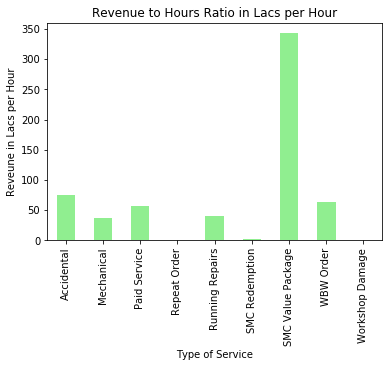

In [21]:
R_H_ratio.plot(kind='bar', color='lightgreen')
plt.title("Revenue to Hours Ratio in Lacs per Hour")
plt.ylabel("Reveune in Lacs per Hour")
plt.xlabel("Type of Service")
plt.show()

### 2. What type of customers (occupation) get the highest amount of repairs.

In [22]:
Total = df['Total Amt Wtd Tax.'].sum()
print ("Total Amount Spent in Servicing including Taxes is {} which is more than 216 Crore Rupees.".format(Total))

Total Amount Spent in Servicing including Taxes is 2163712371.2599998 which is more than 216 Crore Rupees.


In [23]:
df['Cust Type'].unique()

array(['Retail', 'Corporate others', 'Corporate- M&M', 'Fleets', 'MFCWL',
       'Insurance', 'Franchise'], dtype=object)

In [24]:
Retail_sum = df.loc[df['Cust Type'] == "Retail", 'Total Amt Wtd Tax.'].sum()
Retail_Percentage_of_Total = (Retail_sum/Total)*100
print ("Retail_Percentage_of_Total {0:.2f}%".format(Retail_Percentage_of_Total))

Retail_Percentage_of_Total 99.03%


In [25]:
Corp_others_sum = df.loc[df['Cust Type'] == "Corporate others", 'Total Amt Wtd Tax.'].sum()
Corp_others_Percentage_of_Total = (Corp_others_sum/Total)*100
print ("Corp_others_Percentage_of_Total {0:.2f}%".format(Corp_others_Percentage_of_Total))

Corp_others_Percentage_of_Total 0.21%


In [26]:
Corporate_MM_sum = df.loc[df['Cust Type'] == "Corporate- M&M", 'Total Amt Wtd Tax.'].sum()
Corporate_MM_Percentage_of_Total = (Corporate_MM_sum/Total)*100
print ("Corporate_MM_Percentage_of_Total {0:.2f}%".format(Corporate_MM_Percentage_of_Total))

Corporate_MM_Percentage_of_Total 0.13%


In [27]:
Fleets_sum = df.loc[df['Cust Type'] == "Fleets", 'Total Amt Wtd Tax.'].sum()
Fleets_Percentage_of_Total = (Fleets_sum/Total)*100
print ("Fleets_Percentage_of_Total {0:.2f}%".format(Fleets_Percentage_of_Total))

Fleets_Percentage_of_Total 0.58%


In [28]:
MFCWL_sum = df.loc[df['Cust Type'] == "MFCWL", 'Total Amt Wtd Tax.'].sum()
MFCWL_Percentage_of_Total = (MFCWL_sum/Total)*100
print ("MFCWL_Percentage_of_Total {0:.2f}%".format(MFCWL_Percentage_of_Total))

MFCWL_Percentage_of_Total 0.04%


In [29]:
Insurance_sum = df.loc[df['Cust Type'] == "Insurance", 'Total Amt Wtd Tax.'].sum()
Insurance_Percentage_of_Total = (Insurance_sum/Total)*100
print ("Insurance_Percentage_of_Total {0:.5f}%".format(Insurance_Percentage_of_Total))

Insurance_Percentage_of_Total 0.00020%


In [30]:
Franchise_sum = df.loc[df['Cust Type'] == "Franchise", 'Total Amt Wtd Tax.'].sum()
Franchise_Percentage_of_Total = (Franchise_sum/Total)*100
print ("Franchise_Percentage_of_Total {0:.4f}%".format(Franchise_Percentage_of_Total))

Franchise_Percentage_of_Total 0.0022%


In [31]:
print ("Total Revenue from different Customers in Percentage\n",(df.groupby(['Cust Type'], sort=False)['Total Amt Wtd Tax.'].sum()/Total*100))

Total Revenue from different Customers in Percentage
 Cust Type
Retail             99.03
Corporate others    0.21
Corporate- M&M      0.13
Fleets              0.58
MFCWL               0.04
Insurance           0.00
Franchise           0.00
Name: Total Amt Wtd Tax., dtype: float64


#### It is quite clear from above that almost all are of our customers are Retail customers. Hence we should be primarily focusing on them.
#### Any special discounts  or offers for customers of other segments is simply not justified as the amount of  servicing done by them itself is very low. Hence they should not be given any special priority.
#### Amount of Fleet services are also very low which can be attributed to the sparse presence of MFCS Workshop and the multiple options available in Tier 1 Urban areas such as Mumbai, Delhi, Bangalore, Chennai, Kolkata, Hyderabad, Pune. Although Kolkata, Pune, Chennai and Bangalore have 22 workshops among them, it is simply not enough to satisfy the high demand of these Urban locations resulting in Fleet operators staying away from our Workshops.

### 3. How many are regular repairs and how many repairs are accidental / body work. How much percentage are Accidental repairs of the overall services.

In [32]:
df['Order Type'].value_counts()

Running Repairs      269455
Paid Service         135004
Accidental            44159
SMC Redemption        15738
Mechanical            15100
SMC Value Package      9781
Repeat Order           3043
WBW Order                17
Workshop Damage          17
Name: Order Type, dtype: int64

In [33]:
df['Order Type'].unique()

array(['Paid Service', 'SMC Value Package', 'Running Repairs',
       'SMC Redemption', 'Accidental', 'Repeat Order', 'Workshop Damage',
       'Mechanical', 'WBW Order'], dtype=object)

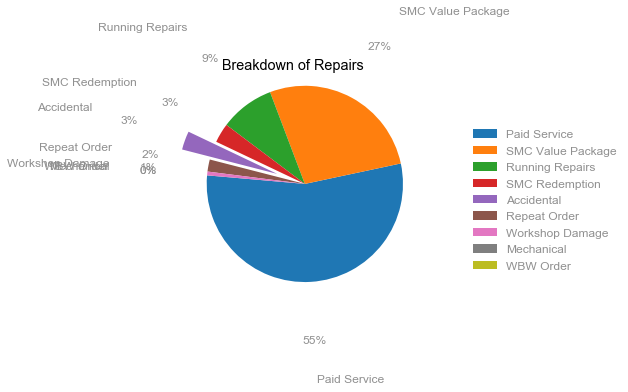

In [34]:
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
labels = df['Order Type'].unique()
explode=(0, 0, 0, 0, 0.3, 0, 0, 0, 0)
#color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC']
ax.pie(df['Order Type'].value_counts(), explode=explode, labels=labels,  
       autopct='%1.0f%%', 
       shadow=False, startangle=175,   
       pctdistance=1.6,labeldistance=2)
ax.axis('equal')
ax.set_title("Breakdown of Repairs")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

In [35]:
Accidental_Repairs = sum(df['Order Type'] == "Accidental")
print ("Total number of Accidental repairs are",Accidental_Repairs)

Total number of Accidental repairs are 44159


In [36]:
Total_Repairs = df['Order Type'].shape[0]
print ("Total number of services are {} which are almost 5 Lacs services.".format(Total_Repairs))

Total number of services are 492314 which are almost 5 Lacs services.


In [37]:
print ("Percentage of Accidental Repairs is {0:.2f}%".format((Accidental_Repairs/Total_Repairs)*100))

Percentage of Accidental Repairs is 8.97%


#### We have a good percentage of Accidental Repairs as we do not want to block workshop bay for a long time as accidental repairs take time however since they are high value repairs we do not want to just pass them on.

#### Also customer who came in for an accidental repair may later on come in for regular repairs as well therefore we are in sweet spot with our accidental repairs.

### 4. Top Car Models being serviced 

In [38]:
df.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID,Invoice_DateTime,JobCard_DateTime,Service Time,Service Hour
0,0,0.00,0.00,MAJIWADA,0.00,0.00,0.00,0.00,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7005200002.00,500.06,Paid Service,0.00,2348.75,400601,BC01,THANE,NaN,NO,0.00,KA19MA1291,0.00,0.00,0.00,0.00,nan,0.00,RUPESH,4051.95,0.00,0.00,0.00,0.00,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,477
1,1,0.00,0.00,THNAE,0.00,0.00,0.00,0.00,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7005200003.00,0.00,SMC Value Package,0.00,0.00,400603,BC01,THANE,NaN,NO,0.00,MH43R3046,0.00,0.00,0.00,0.00,nan,0.00,PRASHANT,1001.29,0.00,0.00,0.00,0.00,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,19
2,2,0.00,0.00,THANE,0.00,0.00,0.00,0.00,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7005200004.00,0.00,Running Repairs,0.00,52.95,400607,BC01,THANE,NaN,NO,0.00,AP09AX0582,0.00,0.00,0.00,0.00,nan,0.00,IMRAN,233.14,0.00,0.00,0.00,0.00,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13,23
3,3,0.00,0.00,THNAE,0.00,0.00,0.00,0.00,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7005200005.00,0.00,SMC Redemption,0.00,0.00,400603,BC01,THANE,NaN,NO,0.00,MH43R3046,0.00,0.00,0.00,0.00,nan,0.00,PRASHANT,0.00,0.00,0.00,0.00,0.00,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12,1
4,4,0.00,0.00,THANE,0.00,0.00,0.00,0.00,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7005200006.00,499.99,Paid Service,0.00,944.16,400603,BC01,THANE,NaN,NO,0.00,MH04CD9768,0.00,0.00,0.00,0.00,nan,0.00,DAYANAND,2747.12,0.00,0.00,0.00,0.00,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35,25


In [39]:
df['Model'].value_counts(ascending=False).head(15)

SWIFT           31899
ALTO            28569
SANTRO          24536
SCORPIO CRDE    23771
WAGONR          22864
I10             21892
INDICA          19810
SWIFT DZIRE     16004
BOLERO          15909
XYLO            13346
I20             12896
INNOVA          11470
CITY            10665
VISTA           10341
INDIGO          10337
Name: Model, dtype: int64

In [40]:
df['Model'].value_counts(ascending=True).tail(15).index

Index(['INDIGO', 'VISTA', 'CITY', 'INNOVA', 'I20', 'XYLO', 'BOLERO',
       'SWIFT DZIRE', 'INDICA', 'I10', 'WAGONR', 'SCORPIO CRDE', 'SANTRO',
       'ALTO', 'SWIFT'],
      dtype='object')

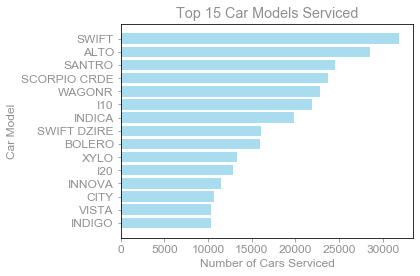

In [41]:
models = df['Model'].value_counts(ascending=True).tail(15).index
y_pos = np.arange(len(models))
models_nos = df['Model'].value_counts(ascending=True).tail(15)

plt.barh(y_pos, models_nos, align='center', alpha=0.7, color='skyblue')
plt.title("Top 15 Car Models Serviced")
plt.yticks(y_pos, models)
plt.ylabel("Car Model")
plt.xlabel("Number of Cars Serviced")
plt.tight_layout()
plt.show()

### Revenue from Each Model/Make Type

In [42]:
make_model_revenue = df.groupby(['Make', 'Model'], sort=False)['Total Amt Wtd Tax.'].sum().sort_values(ascending=False).head(10)
print (make_model_revenue/100000)

Make                  Model       
MAHINDRA &  MAHINDRA  SCORPIO CRDE   1616.33
MARUTI SUZUKI         SWIFT          1240.54
MAHINDRA &  MAHINDRA  BOLERO         1025.05
                      XYLO            889.78
MARUTI SUZUKI         ALTO            817.96
HYUNDAI               SANTRO          814.88
TATA MOTORS           INDICA          787.72
HYUNDAI               I10             727.58
TOYOTA                INNOVA          688.79
MARUTI SUZUKI         WAGONR          668.18
Name: Total Amt Wtd Tax., dtype: float64


In [43]:
print ((make_model_revenue/100000))

Make                  Model       
MAHINDRA &  MAHINDRA  SCORPIO CRDE   1616.33
MARUTI SUZUKI         SWIFT          1240.54
MAHINDRA &  MAHINDRA  BOLERO         1025.05
                      XYLO            889.78
MARUTI SUZUKI         ALTO            817.96
HYUNDAI               SANTRO          814.88
TATA MOTORS           INDICA          787.72
HYUNDAI               I10             727.58
TOYOTA                INNOVA          688.79
MARUTI SUZUKI         WAGONR          668.18
Name: Total Amt Wtd Tax., dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

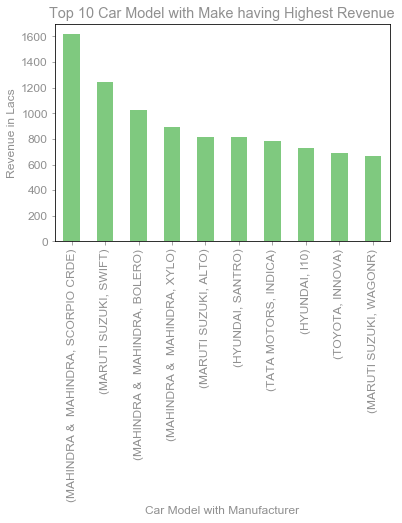

In [44]:
(make_model_revenue/100000).plot(kind='bar', colormap = 'Accent')
plt.title("Top 10 Car Model with Make having Highest Revenue")
plt.ylabel("Revenue in Lacs")
plt.xlabel("Car Model with Manufacturer")
plt.xticks(rotation=90)

In [45]:
print (df.groupby(['Model'], sort=False)['Total Amt Wtd Tax.'].sum())

Model
SPARK            27145522.92
INDICA           78771737.58
ZEN              15053631.24
SANTRO XING      10520021.86
INNOVA           68878551.50
CITY             48495443.61
SWIFT DZIRE      63799355.70
INDIGO           47676206.74
ALTO             81797043.43
WAGONR           66817665.81
SANTRO           81488349.43
I10              72758381.14
VISTA            44349416.23
AVEO              9295913.80
GRAND PUNTO      11019621.42
FIESTA           37128300.11
RAPID             9708052.43
TAVERA           21398622.11
XYLO             88977942.27
POLO             15454126.00
LOGAN P          26679212.94
SWIFT           124054357.03
FIGO             34066815.90
VERITO           33308022.32
ESTEEM 1300       2495720.53
SCORPIO CRDE    161632919.86
SCORPIO NEF      30657630.42
ACCENT           23225234.22
800              23467028.09
SAFARI           21569074.92
                    ...     
ML-CLASS             2787.18
VECTRA               2900.55
ESTILO                 98.76
500     

### 5. Which marketing activity attracts most customers.

In [46]:
df_csd = pd.read_csv(r"Customer_Data.csv")

In [47]:
df_csd.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,1.00,Z001,nan,nan,nan,NaN,NaN
1,32,2,1.00,Z005,nan,nan,nan,NaN,NaN
2,34,4,1.00,Z005,nan,2.00,nan,NaN,NaN
3,35,5,1.00,Z005,nan,nan,nan,NaN,NaN
4,42,7,1.00,Z008,nan,nan,nan,NaN,NaN


In [48]:
df_csd['Data Origin'].value_counts()

Z005    149861
Z006    121660
Z001     63237
Z002     38326
Z004     36801
Z019     29780
Z021     28828
Z018     15382
Z013     13967
Z008     12122
Z016      8118
Z011      8023
Z010      6260
Z017      5685
Z003      5082
Z014      4014
Z012      3840
Z007      2069
Z015       745
Z009       735
Z020       590
Z022        77
Name: Data Origin, dtype: int64

In [49]:
marketing_acitivty = []

In [50]:
df_csd_origin = pd.DataFrame(df_csd['Data Origin'].value_counts())
#df_csd_origin.set_index(['Reference - Customer', 'Reference - Employee', 'Camp - Outdoor', 'Camp - Workshop', 'Fleet', 'Spotted the Outlet', 'Other Outdoor Activity', 'Outdoor Sales Activity', 'Hoardings/Outdoor Advertisements', 'Just Dial/Other Helpline', 'Newspaper AD', 'Float Activity', 'Company Website', 'Newspaper Leaflet', 'Emailers', 'Insurance Company', 'Petrol Pump Activity', 'Reference - Used Car Dealer', 'Television AD', 'Snapdeal/Other Websites', 'Mahindra Sister Concern Employee', 'Radio'])

df_csd_origin.rename(index={'Z005':'Reference - Customer', 'Z006':'Reference - Employee', 'Z001':'Camp - Outdoor', 'Z002':'Camp - Workshop', 'Z004':'Fleet', 'Z019':'Spotted the Outlet', 'Z021':'Other Outdoor Activity', 'Z018':'Outdoor Sales Activity', 'Z013':'Hoardings/Outdoor Advertisements', 'Z008':'Just Dial/Other Helpline', 'Z016':'Newspaper AD', 'Z011':'Float Activity', 'Z010':'Company Website', 'Z017':'Newspaper Leaflet', 'Z003':'Emailers', 'Z014':'Insurance Company', 'Z012':'Petrol Pump Activity', 'Z007':'Reference - Used Car Dealer', 'Z016':'Newspaper AD', 'Z015':'Television AD', 'Z009':'Snapdeal/Other Websites', 'Z020':'Mahindra Sister Concern Employee', 'Z022':'Radio'}, inplace=True)

In [51]:
df_csd_origin.rename(columns={'Data Origin':'Number of Customers'})

,Number of Customers
Reference - Customer,149861
Reference - Employee,121660
Camp - Outdoor,63237
Camp - Workshop,38326
Fleet,36801
Spotted the Outlet,29780
Other Outdoor Activity,28828
Outdoor Sales Activity,15382
Hoardings/Outdoor Advertisements,13967
Just Dial/Other Helpline,12122


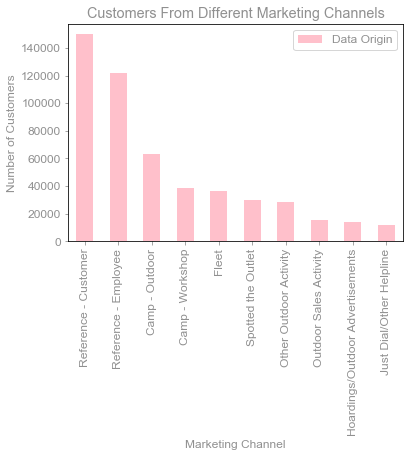

In [52]:
df_csd_origin.head(10).plot(kind='bar', color='pink')
plt.title("Customers From Different Marketing Channels")
plt.ylabel("Number of Customers")
plt.xlabel("Marketing Channel")
plt.show()

### 6. Which Monthly and Yearly revenue trends.

In [53]:
df_months_years = df[['JobCard Date', 'Total Amt Wtd Tax.']]
df_months_years.head()

,JobCard Date,Total Amt Wtd Tax.
0,2014-12-13,4051.95
1,2015-01-02,1001.29
2,2015-01-02,233.14
3,2015-01-03,0.00
4,2015-01-02,2747.12


In [54]:
df_months_years['JobCard_Month'] = pd.DatetimeIndex(df_months_years['JobCard Date']).month
df_months_years['JobCard_Year'] = pd.DatetimeIndex(df_months_years['JobCard Date']).year

#### Create JobCard_month & JObCard_Year columns

In [55]:
df_months_years.head()

,JobCard Date,Total Amt Wtd Tax.,JobCard_Month,JobCard_Year
0,2014-12-13,4051.95,12,2014
1,2015-01-02,1001.29,1,2015
2,2015-01-02,233.14,1,2015
3,2015-01-03,0.00,1,2015
4,2015-01-02,2747.12,1,2015


In [56]:
import calendar
df_months_years['JobCard_Month'] = df_months_years['JobCard_Month'].apply(lambda x: calendar.month_abbr[x])
df_months_years.head()

,JobCard Date,Total Amt Wtd Tax.,JobCard_Month,JobCard_Year
0,2014-12-13,4051.95,Dec,2014
1,2015-01-02,1001.29,Jan,2015
2,2015-01-02,233.14,Jan,2015
3,2015-01-03,0.00,Jan,2015
4,2015-01-02,2747.12,Jan,2015


In [57]:
monthly_revenues = (df_months_years.groupby(['JobCard_Month'])['Total Amt Wtd Tax.'].sum().sort_values(ascending=False))/100000

In [58]:
#monthly_revenues = monthly_revenues.reset_index()

In [59]:
monthly_revenues

JobCard_Month
Sep   2141.05
Aug   2105.94
Oct   2082.80
Jul   2048.42
Jun   2009.32
May   1997.83
Apr   1800.41
Mar   1667.63
Dec   1545.24
Feb   1509.79
Jan   1436.43
Nov   1292.26
Name: Total Amt Wtd Tax., dtype: float64

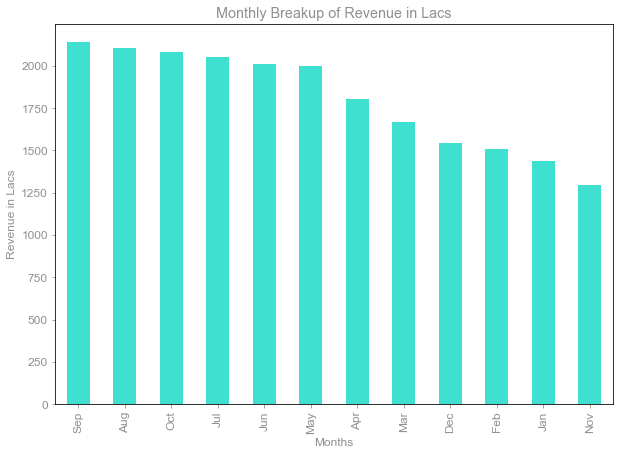

In [60]:
monthly_revenues.plot(kind='bar', color='turquoise', figsize=(10,7))
plt.title("Monthly Breakup of Revenue in Lacs")
plt.ylabel("Revenue in Lacs")
plt.xlabel("Months")
plt.show()

In [61]:
yearly_revenues = (df_months_years.groupby(['JobCard_Year'])['Total Amt Wtd Tax.'].sum().sort_values())/100000

In [62]:
yearly_revenues

JobCard_Year
2012    897.98
2013   2342.78
2014   4016.75
2015   6047.34
2016   8332.27
Name: Total Amt Wtd Tax., dtype: float64

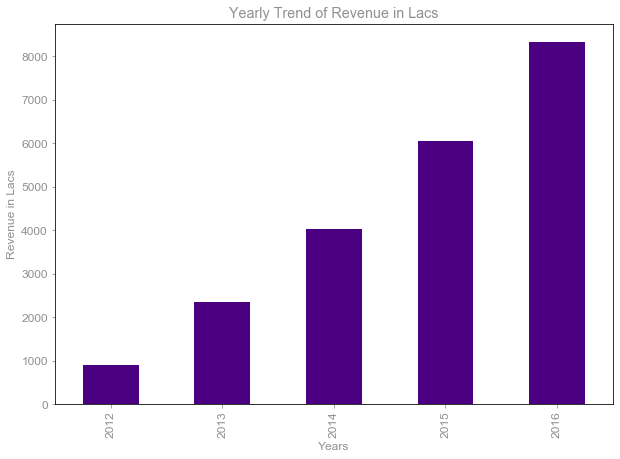

In [63]:
yearly_revenues.plot(kind='bar', color='indigo', figsize=(10,7))
plt.title("Yearly Trend of Revenue in Lacs")
plt.ylabel("Revenue in Lacs")
plt.xlabel("Years")
plt.show()

### 7. Top Insurance Companies

In [64]:
df.shape

(492314, 63)

In [65]:
df_insurance = df.copy()
df_insurance.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID,Invoice_DateTime,JobCard_DateTime,Service Time,Service Hour
0,0,0.00,0.00,MAJIWADA,0.00,0.00,0.00,0.00,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7005200002.00,500.06,Paid Service,0.00,2348.75,400601,BC01,THANE,NaN,NO,0.00,KA19MA1291,0.00,0.00,0.00,0.00,nan,0.00,RUPESH,4051.95,0.00,0.00,0.00,0.00,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,477
1,1,0.00,0.00,THNAE,0.00,0.00,0.00,0.00,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7005200003.00,0.00,SMC Value Package,0.00,0.00,400603,BC01,THANE,NaN,NO,0.00,MH43R3046,0.00,0.00,0.00,0.00,nan,0.00,PRASHANT,1001.29,0.00,0.00,0.00,0.00,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,19
2,2,0.00,0.00,THANE,0.00,0.00,0.00,0.00,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7005200004.00,0.00,Running Repairs,0.00,52.95,400607,BC01,THANE,NaN,NO,0.00,AP09AX0582,0.00,0.00,0.00,0.00,nan,0.00,IMRAN,233.14,0.00,0.00,0.00,0.00,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13,23
3,3,0.00,0.00,THNAE,0.00,0.00,0.00,0.00,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7005200005.00,0.00,SMC Redemption,0.00,0.00,400603,BC01,THANE,NaN,NO,0.00,MH43R3046,0.00,0.00,0.00,0.00,nan,0.00,PRASHANT,0.00,0.00,0.00,0.00,0.00,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12,1
4,4,0.00,0.00,THANE,0.00,0.00,0.00,0.00,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7005200006.00,499.99,Paid Service,0.00,944.16,400603,BC01,THANE,NaN,NO,0.00,MH04CD9768,0.00,0.00,0.00,0.00,nan,0.00,DAYANAND,2747.12,0.00,0.00,0.00,0.00,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35,25


In [66]:
df_insurance['Insurance Company'].dropna(inplace=True)

In [67]:
df_insurance['Insurance Company'].unique()

array(['UNITED INDIA INSURANCE CO. LTD',
       'RELIANCE GENERAL INSURANCE COMPANY',
       'BHARTI AXA GENRERAL INSURANCE', 'Oriental Insurance Company Ltd.',
       'NATIONAL INSURANCE COMPANY LIMITED',
       'THE NEW INDIA ASSURANCE CO. LTD.', 'ICICI LOMBARD CUSTOMER DUES',
       'IFFCOTOKIO GENERAL INSURANCE',
       'Future Generali India Ins. Co Ltd',
       'BAJAJ ALLIANZE GENERAL INSURANCE CO',
       'SBI General Insurance Company Ltd.', 'HDFC ERGO',
       'TATA AIG GENERAL INSURANCE CO. LTD.',
       'CHOLAMANDALAM GENERAL INSURANCE CO.', 'L&T INSURANCE',
       'ROYAL SUNDARAM GENERAL', 'LIBERTY VIDEOCON GENERAL INSURANCE',
       'UNIVERSAL SOMPO GENERAL INSURANCE C',
       'Magma HDI General Insurance Co Ltd',
       'Kotak Mahindra General Insurance Lt',
       'Corporate Warranties India Pvt. Ltd'], dtype=object)

In [68]:
df_insurance.shape

(492314, 63)

In [69]:
df_insurance['Customer No.'].nunique()

253484

In [70]:
df_insurance.groupby(['Insurance Company'])['Customer No.'].nunique().sum()

15684

In [71]:
insurance = df_insurance.groupby(['Insurance Company'])['Customer No.'].nunique().sort_values(ascending=False)
insurance

Insurance Company
THE NEW INDIA ASSURANCE CO. LTD.       3750
NATIONAL INSURANCE COMPANY LIMITED     2227
UNITED INDIA INSURANCE CO. LTD         1615
RELIANCE GENERAL INSURANCE COMPANY     1184
ICICI LOMBARD CUSTOMER DUES            1076
Oriental Insurance Company Ltd.         826
BHARTI AXA GENRERAL INSURANCE           750
BAJAJ ALLIANZE GENERAL INSURANCE CO     652
UNIVERSAL SOMPO GENERAL INSURANCE C     523
IFFCOTOKIO GENERAL INSURANCE            520
TATA AIG GENERAL INSURANCE CO. LTD.     498
HDFC ERGO                               480
CHOLAMANDALAM GENERAL INSURANCE CO.     416
ROYAL SUNDARAM GENERAL                  301
Future Generali India Ins. Co Ltd       282
SBI General Insurance Company Ltd.      224
L&T INSURANCE                           149
Magma HDI General Insurance Co Ltd       69
Kotak Mahindra General Insurance Lt      51
Corporate Warranties India Pvt. Ltd      50
LIBERTY VIDEOCON GENERAL INSURANCE       41
Name: Customer No., dtype: int64

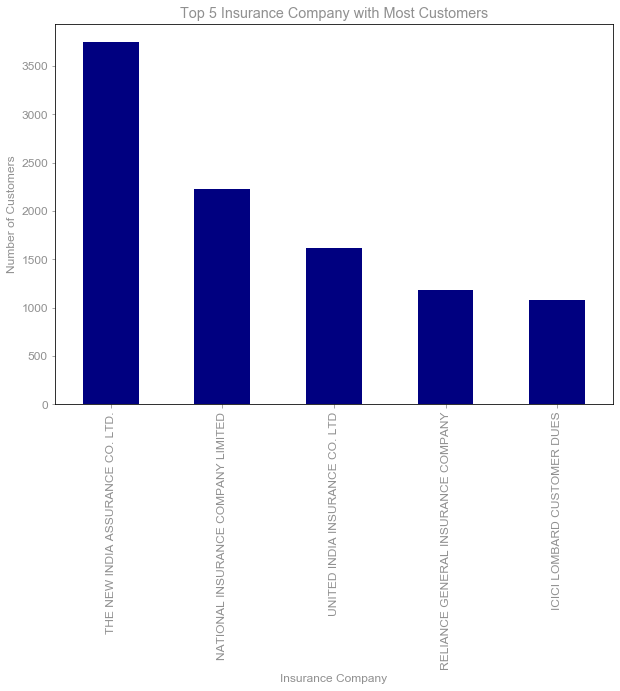

In [72]:
insurance.head(5).plot(kind='bar', color='Navy', figsize=(10,7))
plt.title("Top 5 Insurance Company with Most Customers")
plt.ylabel("Number of Customers")
plt.xlabel("Insurance Company")
plt.show()

#### 1. Chart shows the Top 5 insurance companies having the most customers. 
#### 2. However, before it is important to note that the total customer incoming are more than 253K whereas total customer availing insurance is around 15.5K which is about only 6% of the total customer base.
#### 3. Hence special business actions for these customers may not justify the overall costs.

### Plot top 20 car model which had been serviced

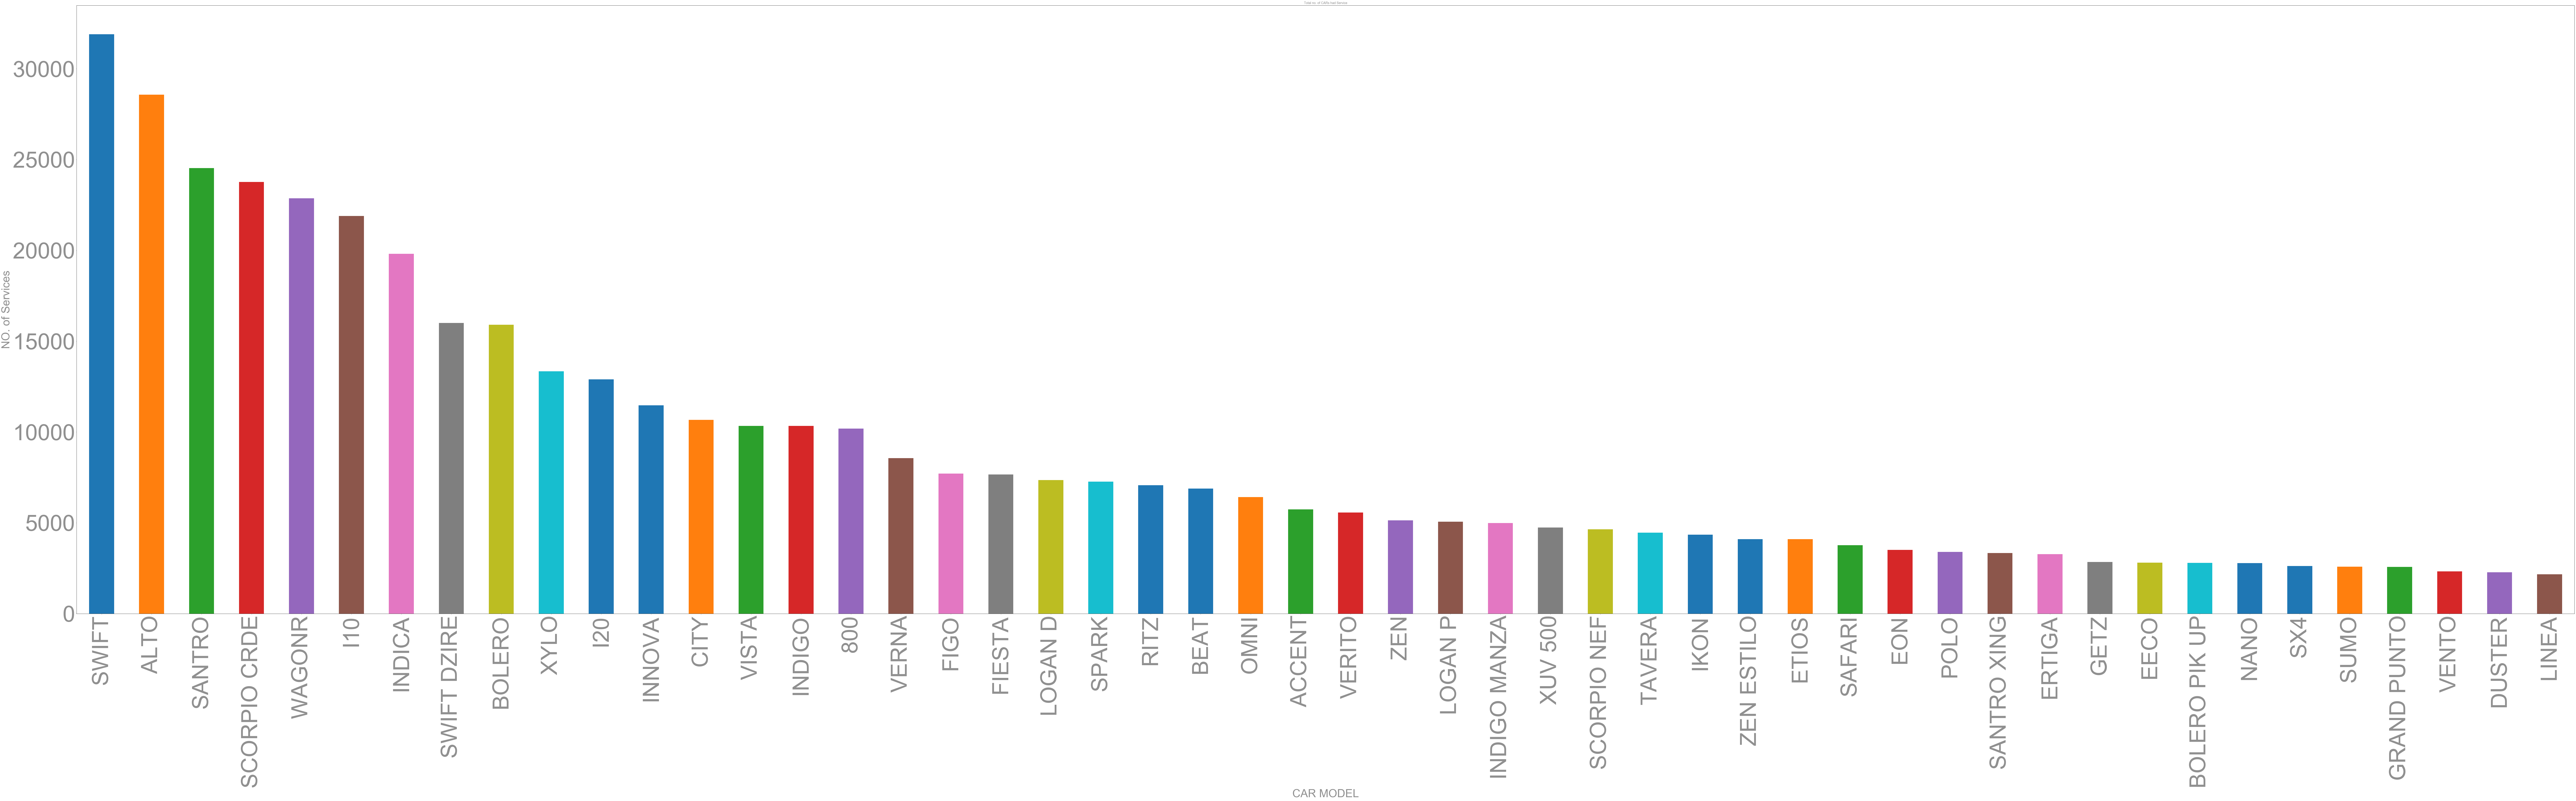

SWIFT           31899
ALTO            28569
SANTRO          24536
SCORPIO CRDE    23771
WAGONR          22864
I10             21892
INDICA          19810
SWIFT DZIRE     16004
BOLERO          15909
XYLO            13346
I20             12896
INNOVA          11470
CITY            10665
VISTA           10341
INDIGO          10337
800             10185
VERNA            8564
FIGO             7709
FIESTA           7667
LOGAN D          7353
Name: Model, dtype: int64


In [73]:
Car_model = df_invoice['Model'].value_counts()
plt.figure(figsize=(200,50))
plot = Car_model[:50].plot(kind='bar', title = "Total no. of CARs had Service")
plt.xticks(fontsize =100 , rotation=90)
plt.yticks(fontsize =100)
plt.xlabel('CAR MODEL', fontsize=50)
plt.ylabel('NO. of Services', fontsize=50)
plt.show()
print(Car_model[:20])

In [74]:
pd.options.display.float_format = '{:.2f}'.format
Brands = df_invoice.groupby('Make')['Total Value'].sum().sort_values(ascending=False)
print('Revenue generate from Model :\n\n', Brands[0:20])

Revenue generate from Model :

 Make
MAHINDRA &  MAHINDRA   346520590.82
MARUTI SUZUKI          286944641.99
HYUNDAI                204326010.39
TATA MOTORS            157169291.71
GENERAL MOTORS          74353756.41
TOYOTA                  60324411.17
FORD                    59323729.10
HONDA                   43742099.77
SKODA                   22123055.16
FIAT                    18102316.33
VOLKSWAGEN              13273854.64
NISSAN                   5036919.92
RENAULT                  4343420.67
MITSUBISHI MOTORS        3975841.08
DAEWOO                    974701.98
BMW                       832655.02
MERCEDES BENZ             790413.22
AUDI                      368236.51
FORCE                     363804.86
HINDUSTAN MOTORS          253174.13
Name: Total Value, dtype: float64


Revenue generate from Model :

 Model
SCORPIO CRDE   106436433.39
SWIFT           72493786.20
SANTRO          60230170.62
XYLO            59588206.53
INDICA          53362958.83
ALTO            51608409.80
BOLERO          48248691.11
I10             46791672.25
WAGONR          45967477.12
INNOVA          38419134.67
LOGAN D         37469776.76
CITY            33399848.32
SWIFT DZIRE     32078680.06
INDIGO          30312743.52
I20             30117146.88
VISTA           27149321.29
VERNA           26367671.80
FIESTA          24916625.96
LOGAN P         24330386.60
VERITO          20927684.70
Name: Total Value, dtype: float64


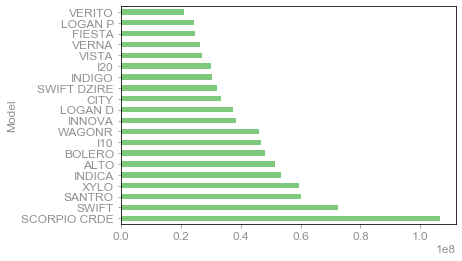

In [75]:
pd.options.display.float_format = '{:.2f}'.format
car = df_invoice.groupby('Model')['Total Value'].sum().sort_values(ascending=False)
print('Revenue generate from Model :\n\n', car[0:20])
car[:20].plot(x= car.index, y = car, kind = 'barh', colormap = 'Accent');

Text(0, 0.5, 'Total Labour Income (Rs. )')

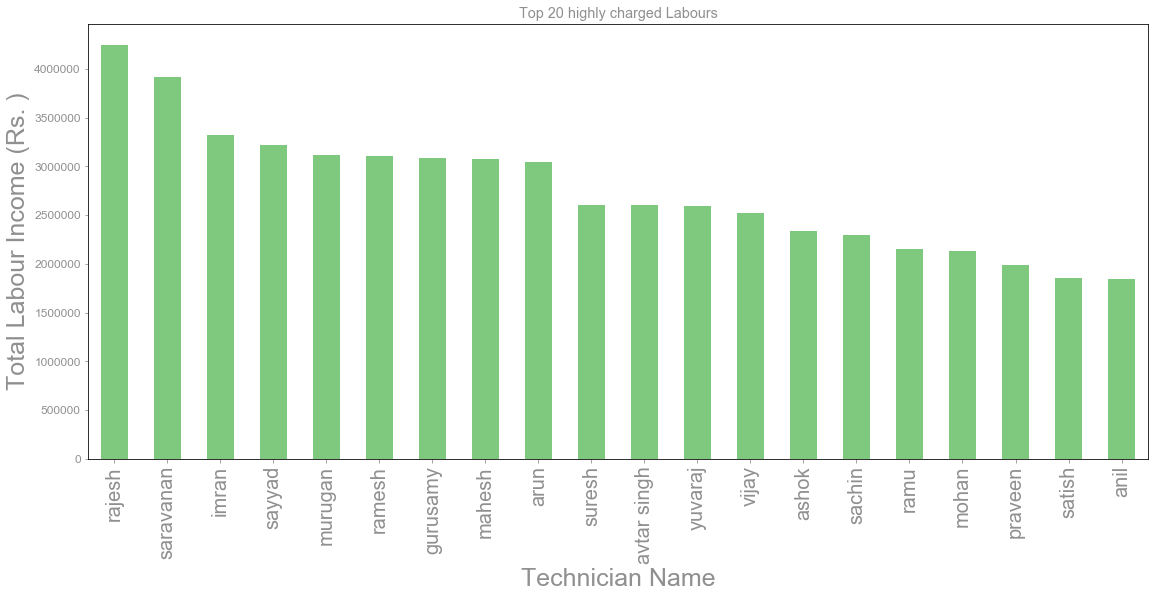

In [76]:
plt.figure(figsize=(19,8))
df_invoice['Technician Name'] = df_invoice['Technician Name'].str.lower()
labour_charge = df_invoice.groupby('Technician Name')['Labour Total'].sum().sort_values(ascending=False)
labour_charge[:20].plot(x= labour_charge.index, y = labour_charge, kind = 'bar', colormap = 'Accent');
plt.xticks(fontsize =20 , rotation=90)
plt.title('Top 20 highly charged Labours')
plt.xlabel('Technician Name', fontsize=25)
plt.ylabel('Total Labour Income (Rs. )', fontsize=25)

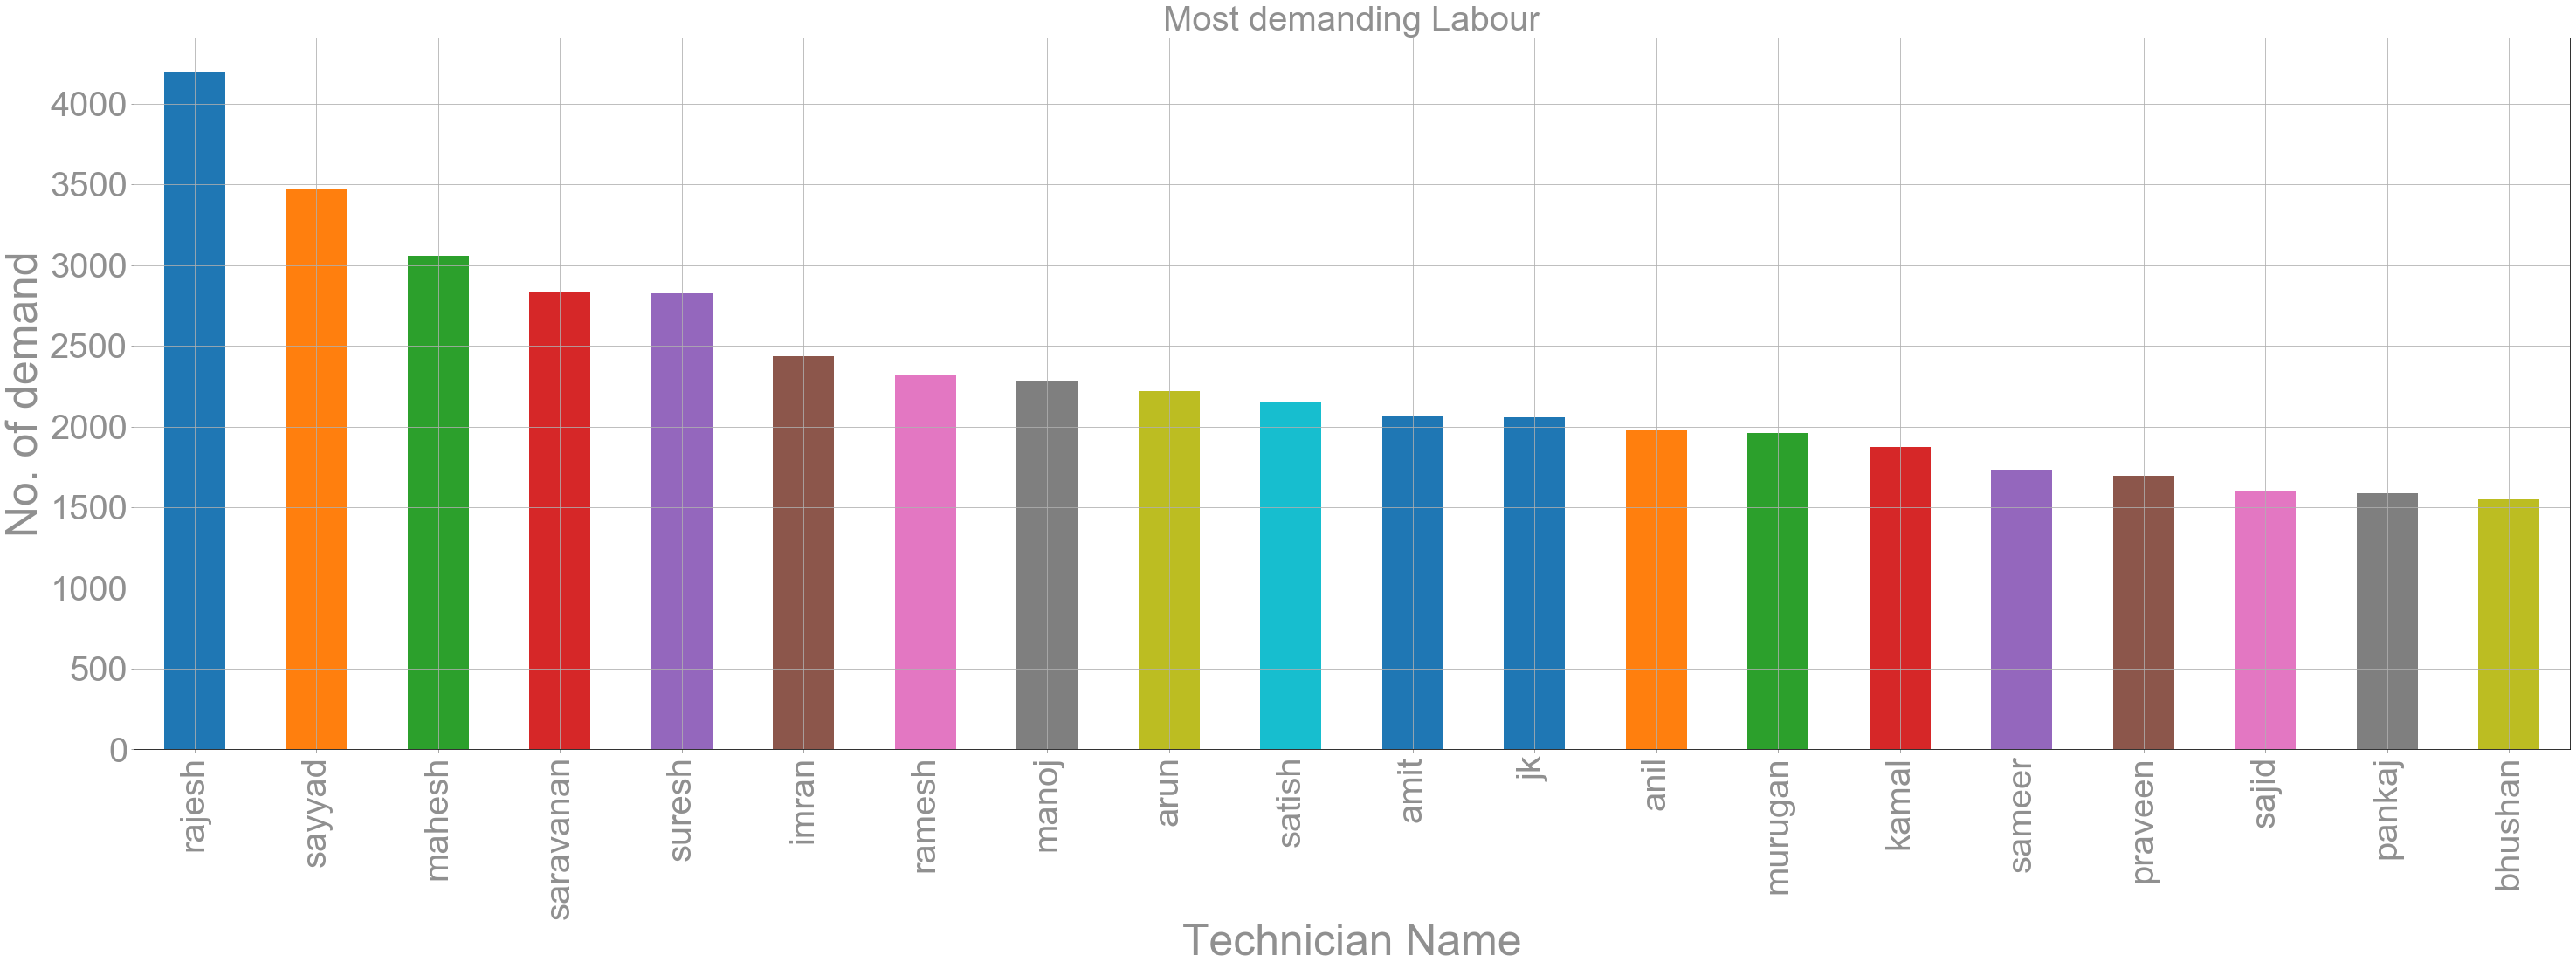

In [77]:
labour = df_invoice['Technician Name'].value_counts() 
plot = labour[:20].plot(kind='bar',figsize=(50,15))
plt.title("Most demanding Labour",size=40)
plt.xticks(fontsize =40 , rotation=90)
plt.yticks(fontsize =40 )
plt.xlabel('Technician Name', fontsize=50)
plt.ylabel('No. of demand', fontsize=50)
plt.grid(True)

##### Should a new workshop be opened in a location. parts to labour ratio for each service type. (should be as low as possible) Average repair time for specific models. (if a garage takes more time than average then they are not working efficiently) Inventory demand forecasting.

In [78]:
JTD_data =pd.read_csv("JTD.csv")
JTD_data.reset_index(drop=True, inplace=True)

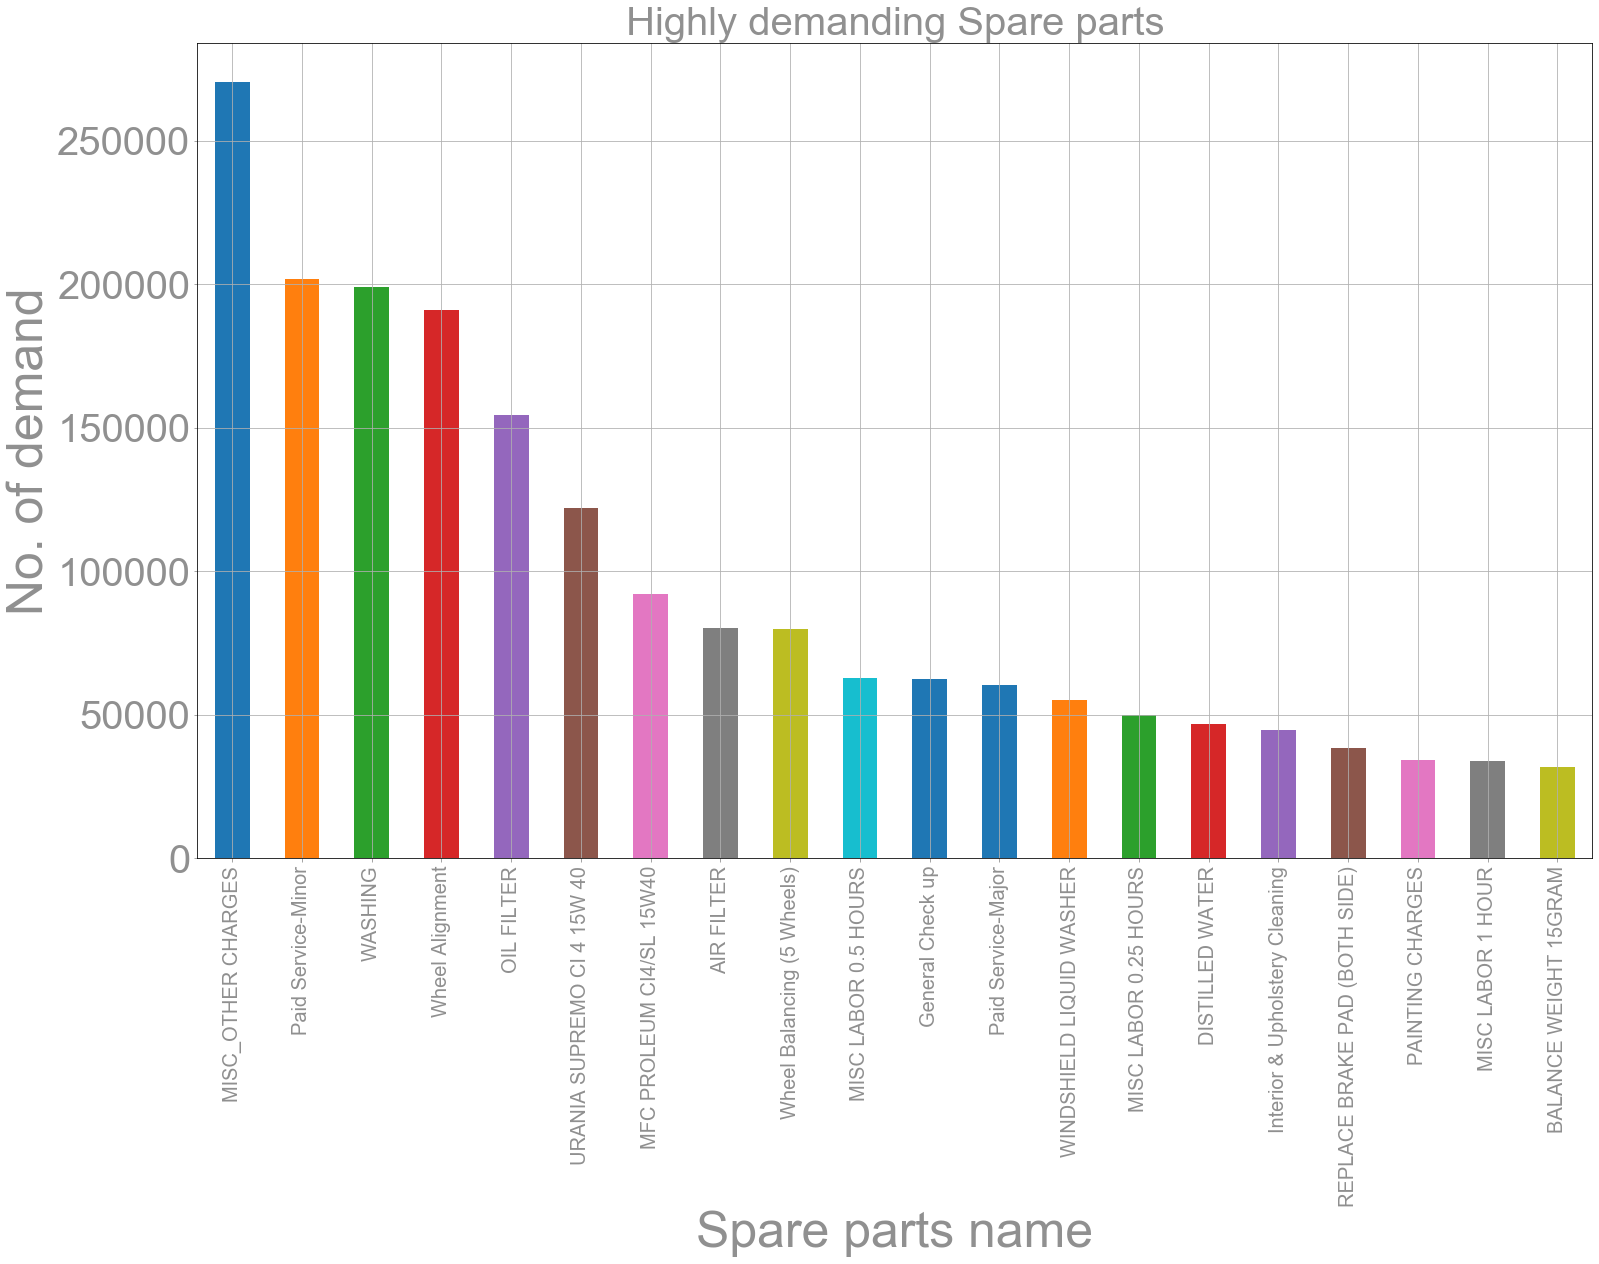

In [79]:
plot = JTD_data['Description'].value_counts()[0:20].plot(kind='bar', figsize=(25,15))
plt.title("Highly demanding Spare parts",size=40)
plt.xticks(fontsize =20 , rotation=90)
plt.yticks(fontsize =40 )
plt.xlabel('Spare parts name', fontsize=50)
plt.ylabel('No. of demand', fontsize=50)
plt.grid(True)

##### High Parts-to-Labor Ratio
Parts-to-labor ratio can help managers determine whether they are charging too much or little for parts and labor. According to Bob O'Connor of Motor Magazine, a parts-to-labor ratio in the range of 0.8 to 1 is considered normal for the auto repair industry. If the parts-to-labor ratio exceeds 1, it means parts sales account for a greater proportion of total revenue than labor sales, which indicates that a shop is charging too little for labor or too much for parts.

##### Low Parts-to-Labor Ratio

When the parts-to-labor ratio is lower than 1, it means a company makes more revenue in the form of labor sales than parts sales. If the parts-to-labor ratio is low, it indicates that the company may not be charging enough for parts or is performing labor-intensive services that do not result in selling many parts. Increasing the markup on parts and performing more procedures that require expensive parts can increase a low parts-to-labor ratio.

In [80]:
# ratio = movie_data.groupby('release_year')['profit_(in_US_Dollars)'].sum()
labour = df_invoice[['District','Labour Total']]
#part =JTD_data[[]]

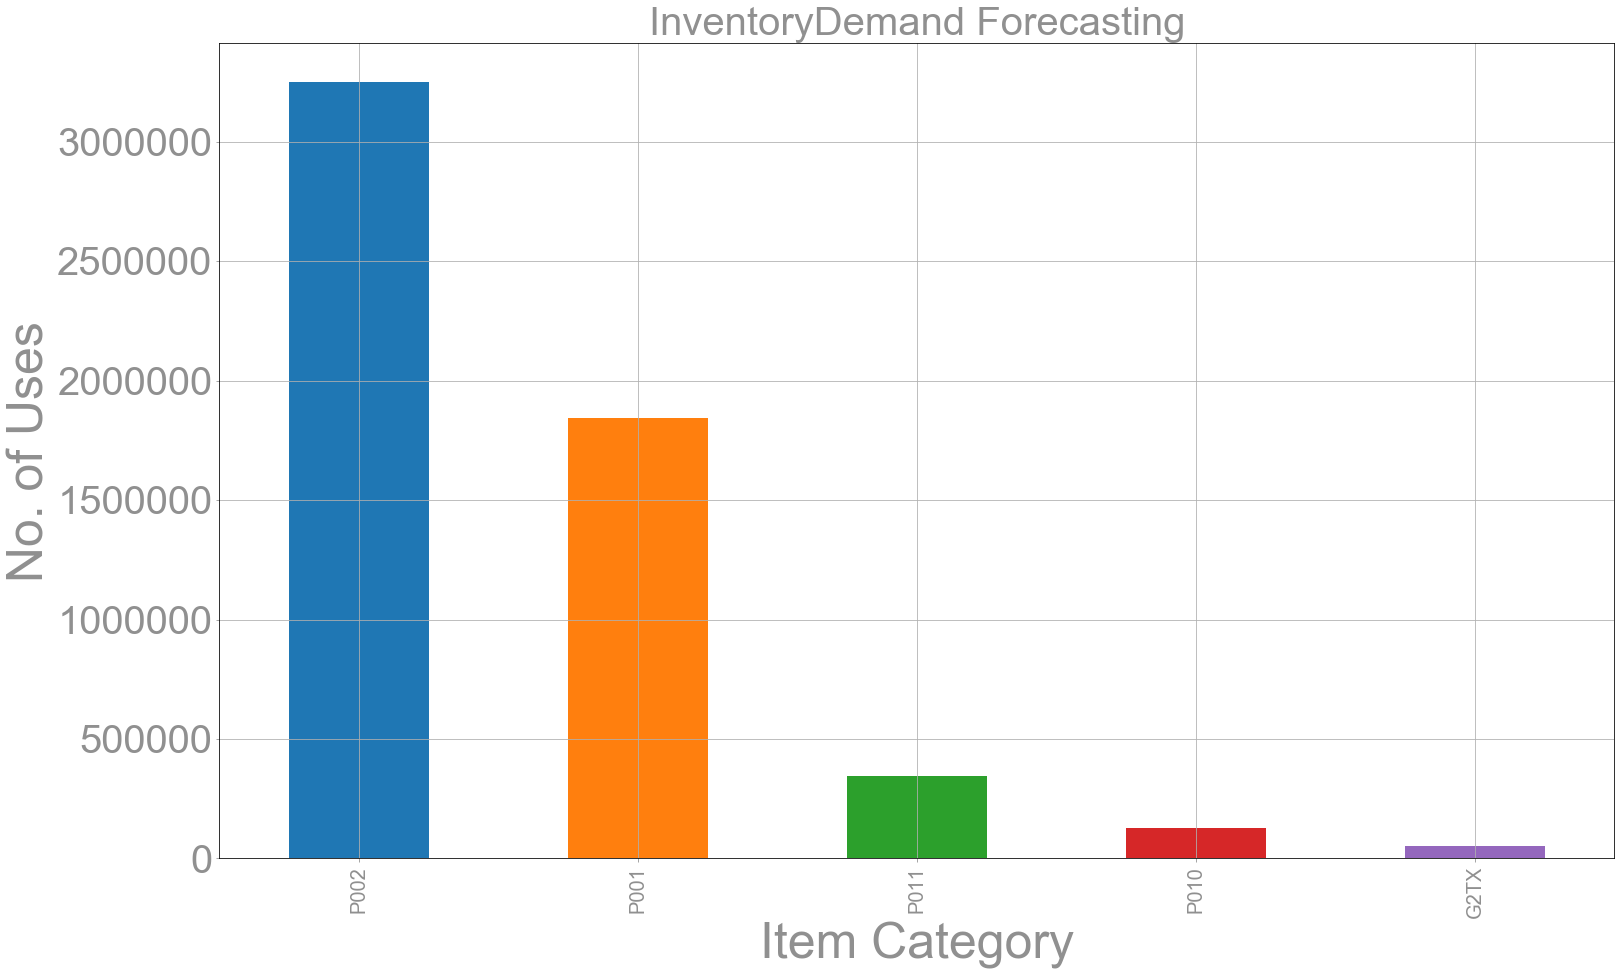

In [81]:
Inventory = JTD_data['Item Category'].value_counts().plot(kind='bar', figsize=(25,15))
plt.title("InventoryDemand Forecasting",size=40)
plt.xticks(fontsize =20 , rotation=90)
plt.yticks(fontsize =40 )
plt.xlabel('Item Category', fontsize=50)
plt.ylabel('No. of Uses', fontsize=50)
plt.grid(True)

In [82]:
JTD_data.groupby("Item Category")["Order Quantity"].count()
Item_descrp = JTD_data.groupby("Item Category")["Order Quantity"].sum().sort_values(ascending=False)
# print(Item_descrp)
Item_order = JTD_data.groupby("Order Quantity")["Description"].count()[0:20].sort_values(ascending=False)
# print(Item_order)
Item_price = JTD_data.groupby("Item Category")["Net value"].sum().sort_values(ascending=False)
# print(Item_price)

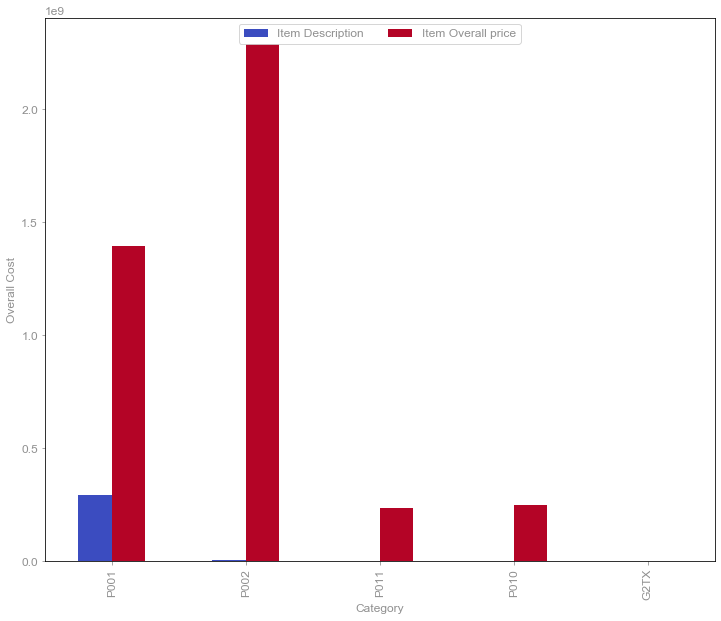

In [83]:
pd.options.display.float_format = '{:.2f}'.format
Inventory = pd.DataFrame([Item_descrp, Item_price])
Inventory.index =['Item Description', 'Item Overall price']
Inventory.T.plot(kind='bar', figsize = (12,10), colormap = 'coolwarm')
plt.xlabel('Category')
plt.ylabel('Overall Cost')
plt.legend(loc=9,ncol=4);

In [84]:
df_invoice['year'] = pd.DatetimeIndex(df_invoice['Invoice Date']).year

In [85]:
X = df_invoice.groupby(['year','District'])['Total Value'].sum()

In [86]:
df_invoice['Plant'].unique()
for year in range(2012,2017):
    print(year,X[(year)].idxmax(), X[(year)].max())

2012 Maharashtra 35829340.30000032
2013 Maharashtra 70711798.19000037
2014 Maharashtra 105330310.49999954
2015 Tamil Nadu 181551245.00999245
2016 Andaman and Nico.In. 0.0


In [87]:
#df_invoice['Total Days'] = df_invoice['JobCard Date'].sub(df_invoice['Invoice Date'], axis=0)
#df_invoice['Invoice Date'].astype(int)
df_invoice['Invoice Date'] = pd.to_datetime(df_invoice['Invoice Date'],dayfirst=True)
df_invoice['JobCard Date'] = pd.to_datetime(df_invoice['JobCard Date'],dayfirst=True)
df_invoice['Invoice Date'] = df_invoice['Invoice Date'].replace("-", "")
df_invoice['JobCard Date'] = df_invoice['JobCard Date'].replace("-", "")
df_invoice['Invoice Date'].head()

0   2015-01-02
1   2015-01-03
2   2015-01-03
3   2015-01-03
4   2015-01-03
Name: Invoice Date, dtype: datetime64[ns]

In [88]:
df_invoice['Total Days'] = (df_invoice['JobCard Date'] - df_invoice['Invoice Date']).dt.days
df_invoice['Total Days'] = df_invoice['Total Days'].abs()

In [89]:
df_invoice.drop(['Customer No.','Gate Pass Time','Invoice No','Job Card No','Recovrbl Exp','TDS amount'],1)

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,District,Expiry Date,Gate Pass Date,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice Time,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID,year,Total Days
0,0,0.00,0.00,MAJIWADA,0.00,0.00,0.00,0.00,Thane,NaN,NaN,Retail,Maharashtra,NaN,NaN,0.00,0.00,0.00,0.00,NaN,2015-01-02,11:30:36,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7005200002.00,500.06,Paid Service,0.00,2348.75,400601,BC01,THANE,NaN,NO,KA19MA1291,0.00,0.00,0.00,0.00,nan,rupesh,4051.95,0.00,0.00,0.00,0.00,4051.95,BC01FS1,2015,20
1,1,0.00,0.00,THNAE,0.00,0.00,0.00,0.00,THNAE,NaN,NaN,Retail,Maharashtra,NaN,NaN,0.00,0.00,0.00,0.00,NaN,2015-01-03,10:07:32,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7005200003.00,0.00,SMC Value Package,0.00,0.00,400603,BC01,THANE,NaN,NO,MH43R3046,0.00,0.00,0.00,0.00,nan,prashant,1001.29,0.00,0.00,0.00,0.00,1001.29,BC01SA2,2015,1
2,2,0.00,0.00,THANE,0.00,0.00,0.00,0.00,THANE[W],NaN,NaN,Retail,Maharashtra,NaN,NaN,0.00,0.00,0.00,0.00,NaN,2015-01-03,11:12:57,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7005200004.00,0.00,Running Repairs,0.00,52.95,400607,BC01,THANE,NaN,NO,AP09AX0582,0.00,0.00,0.00,0.00,nan,imran,233.14,0.00,0.00,0.00,0.00,233.14,BC01SA2,2015,1
3,3,0.00,0.00,THNAE,0.00,0.00,0.00,0.00,THNAE,NaN,NaN,Retail,Maharashtra,NaN,NaN,0.00,0.00,0.00,0.00,NaN,2015-01-03,11:40:44,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7005200005.00,0.00,SMC Redemption,0.00,0.00,400603,BC01,THANE,NaN,NO,MH43R3046,0.00,0.00,0.00,0.00,nan,prashant,0.00,0.00,0.00,0.00,0.00,0.00,BC01SA2,2015,0
4,4,0.00,0.00,THANE,0.00,0.00,0.00,0.00,THANE,NaN,NaN,Retail,Maharashtra,NaN,NaN,0.00,0.00,0.00,0.00,NaN,2015-01-03,12:07:17,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7005200006.00,499.99,Paid Service,0.00,944.16,400603,BC01,THANE,NaN,NO,MH04CD9768,0.00,0.00,0.00,0.00,nan,dayanand,2747.12,0.00,0.00,0.00,0.00,2747.12,BC01SA2,2015,1
5,5,0.00,0.00,THANE,0.00,0.00,0.00,0.00,THANE,NaN,NaN,Retail,Maharashtra,NaN,NaN,0.00,0.00,0.00,0.00,NaN,2015-01-03,12:10:08,2015-01-02,15:15:10,13122,0.00,TOYOTA,0.00,INNOVA,7005200007.00,851.70,Running Repairs,0.00,14.22,400603,BC01,THANE,NaN,NO,MH04GM2960,0.00,0.00,0.00,0.00,nan,dayanand,865.92,0.00,0.00,0.00,0.00,865.92,BC01SA2,2015,1
6,6,0.00,0.00,THANE WEST,0.00,0.00,0.00,0.00,THANE,NaN,NaN,Retail,Maharashtra,NaN,NaN,0.00,0.00,0.00,0.00,NaN,2015-01-03,12:12:31,2015-01-02,12:15:55,26964,0.00,HONDA,0.00,CITY,7005200008.00,749.42,Running Repairs,0.00,0.00,400607,BC01,THANE,NaN,NO,MH06AL1935,0.00,0.00,0.00,0.00,nan,prashant,749.42,0.00,0.00,0.00,0.00,749.42,BC01SA2,2015,1
7,7,0.00,0.00,G.B. ROAD,0.00,0.00,0.00,0.00,THANE,NaN,NaN,Retail,Maharashtra,NaN,NaN,0.00,0.00,0.00,0.00,NaN,2015-01-03,12:18:54,2015-01-03,12:02:32,12943,0.00,MARUTI SUZUKI,0.00,SWIFT DZIRE,7005200009.00,0.00,Running Repairs,0.00,0.00,400606,BC01,THANE,NaN,NO,MH04FR8641,0.00,0.00,0.00,0.00,nan,sameer,0.00,0.00,0.00,0.00,0.00,0.00,BC01SA2,2015,0
8,8,0.00,0.00,THANE,0.00,0.00,0.00,0.00,THANE[W],NaN,NaN,Retail,Maharashtra,NaN,NaN,0.00,0.00,0.00,0.00,NaN,2015-01-03,13:07:27,2015-01-03,10:21:26,18563,0.00,TATA MOTORS,0.00,INDIGO,7005200010.00,0.00,Running Repairs,0.00,0.00,400607,BC01,THANE,NaN,NO,MH05BJ558,0.00,0.00,0.00,0.00,nan,harshad,0.00,0.00,0.00,0.00,0.00,0.00,BC01SA1,2015,0
9,9,0.00,0.00,THANE,0.00,0.00,0.00,0.00,THANE,NaN,NaN,Retail,Maharashtra,NaN,NaN,0.00,0.00,0.00,0.00,NaN,2015-01-03,15:54:21,2015-01-03,11:11:00,5443,698.92,MARUTI SUZUKI,49.99,ALTO,7005200011.00,499.95,Paid Service,0.00,2663.75,4

In [90]:
df_invoice['Time_Diff'] = pd.to_datetime(df_invoice['JobCard Time']) - pd.to_datetime(df_invoice['Invoice Time'])

Text(0.5, 1.0, 'Frequency Distribution Plot of Prices')

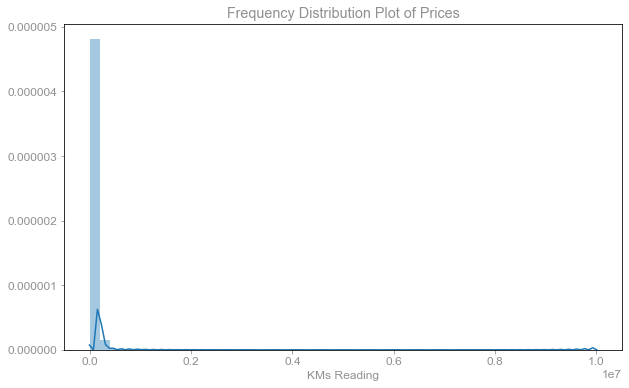

In [91]:
import seaborn as sns
x = df_invoice['KMs Reading']
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Prices')

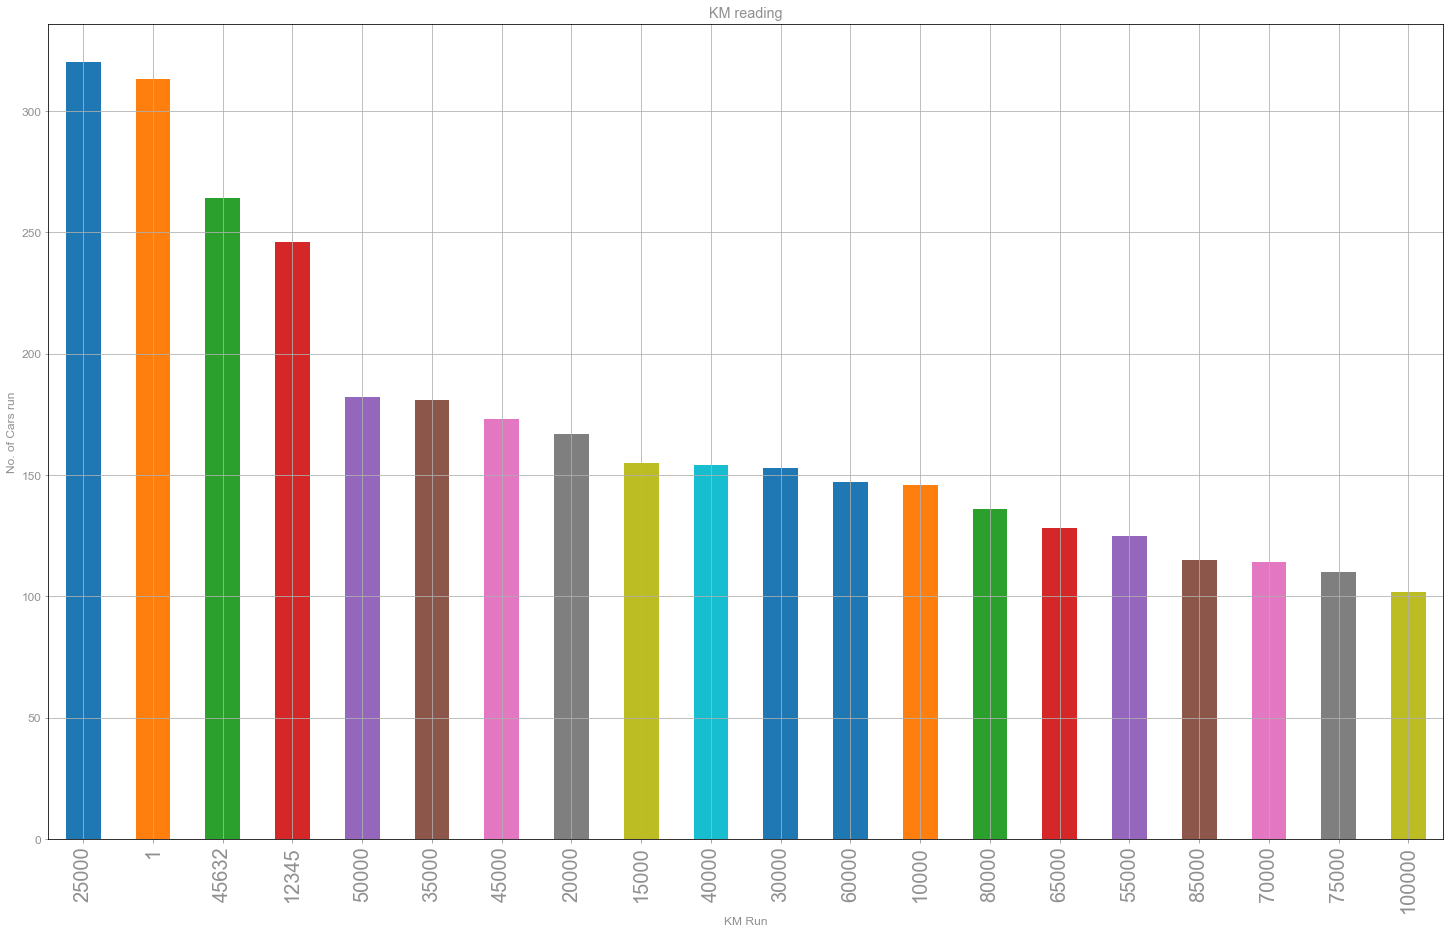

In [92]:
district = df_invoice['KMs Reading'].value_counts().sort_values(ascending=False)[0:20] 
plot = district.plot(kind='bar', title = "KM reading", figsize=(25,15))
plt.xticks(fontsize =20 , rotation=90)
plt.xlabel('KM Run')
plt.ylabel('No. of Cars run')
plt.grid(True)

In [93]:
service_1 = df_invoice[['Order Type','KMs Reading','Make','Total Value']]
#service_1
Data = service_1[service_1['KMs Reading']==1].groupby('Order Type').sum()
data = service_1[service_1['KMs Reading']==1]['Order Type'].value_counts()

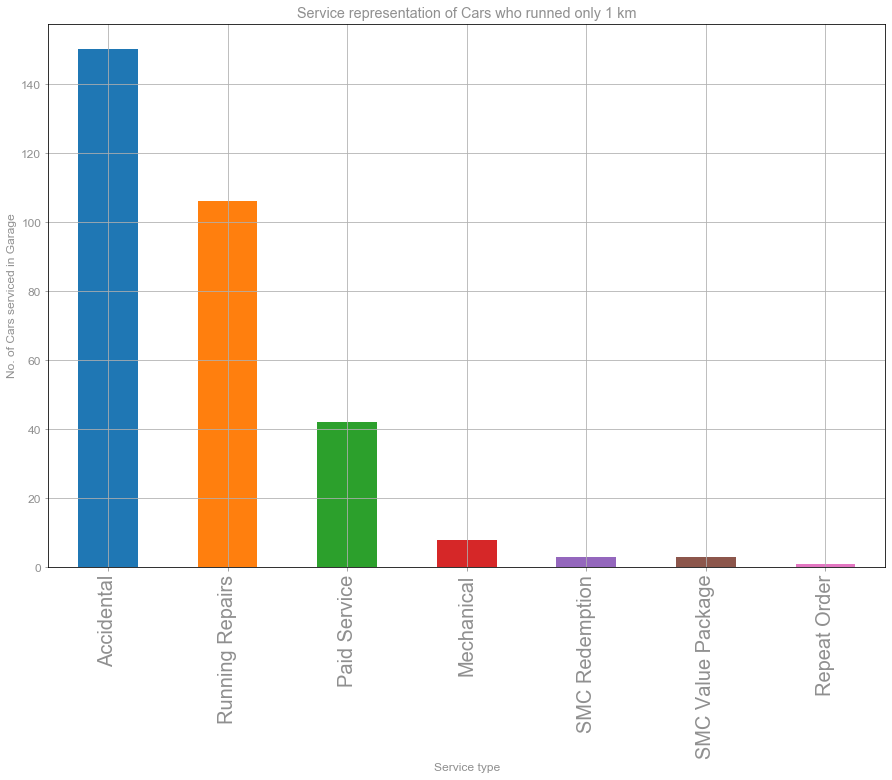

In [94]:
data.plot(kind= 'bar',title = "Service representation of Cars who runned only 1 km", figsize=(15,10))
plt.xticks(fontsize =20 , rotation=90)
plt.xlabel('Service type')
plt.ylabel('No. of Cars serviced in Garage')
plt.grid(True)

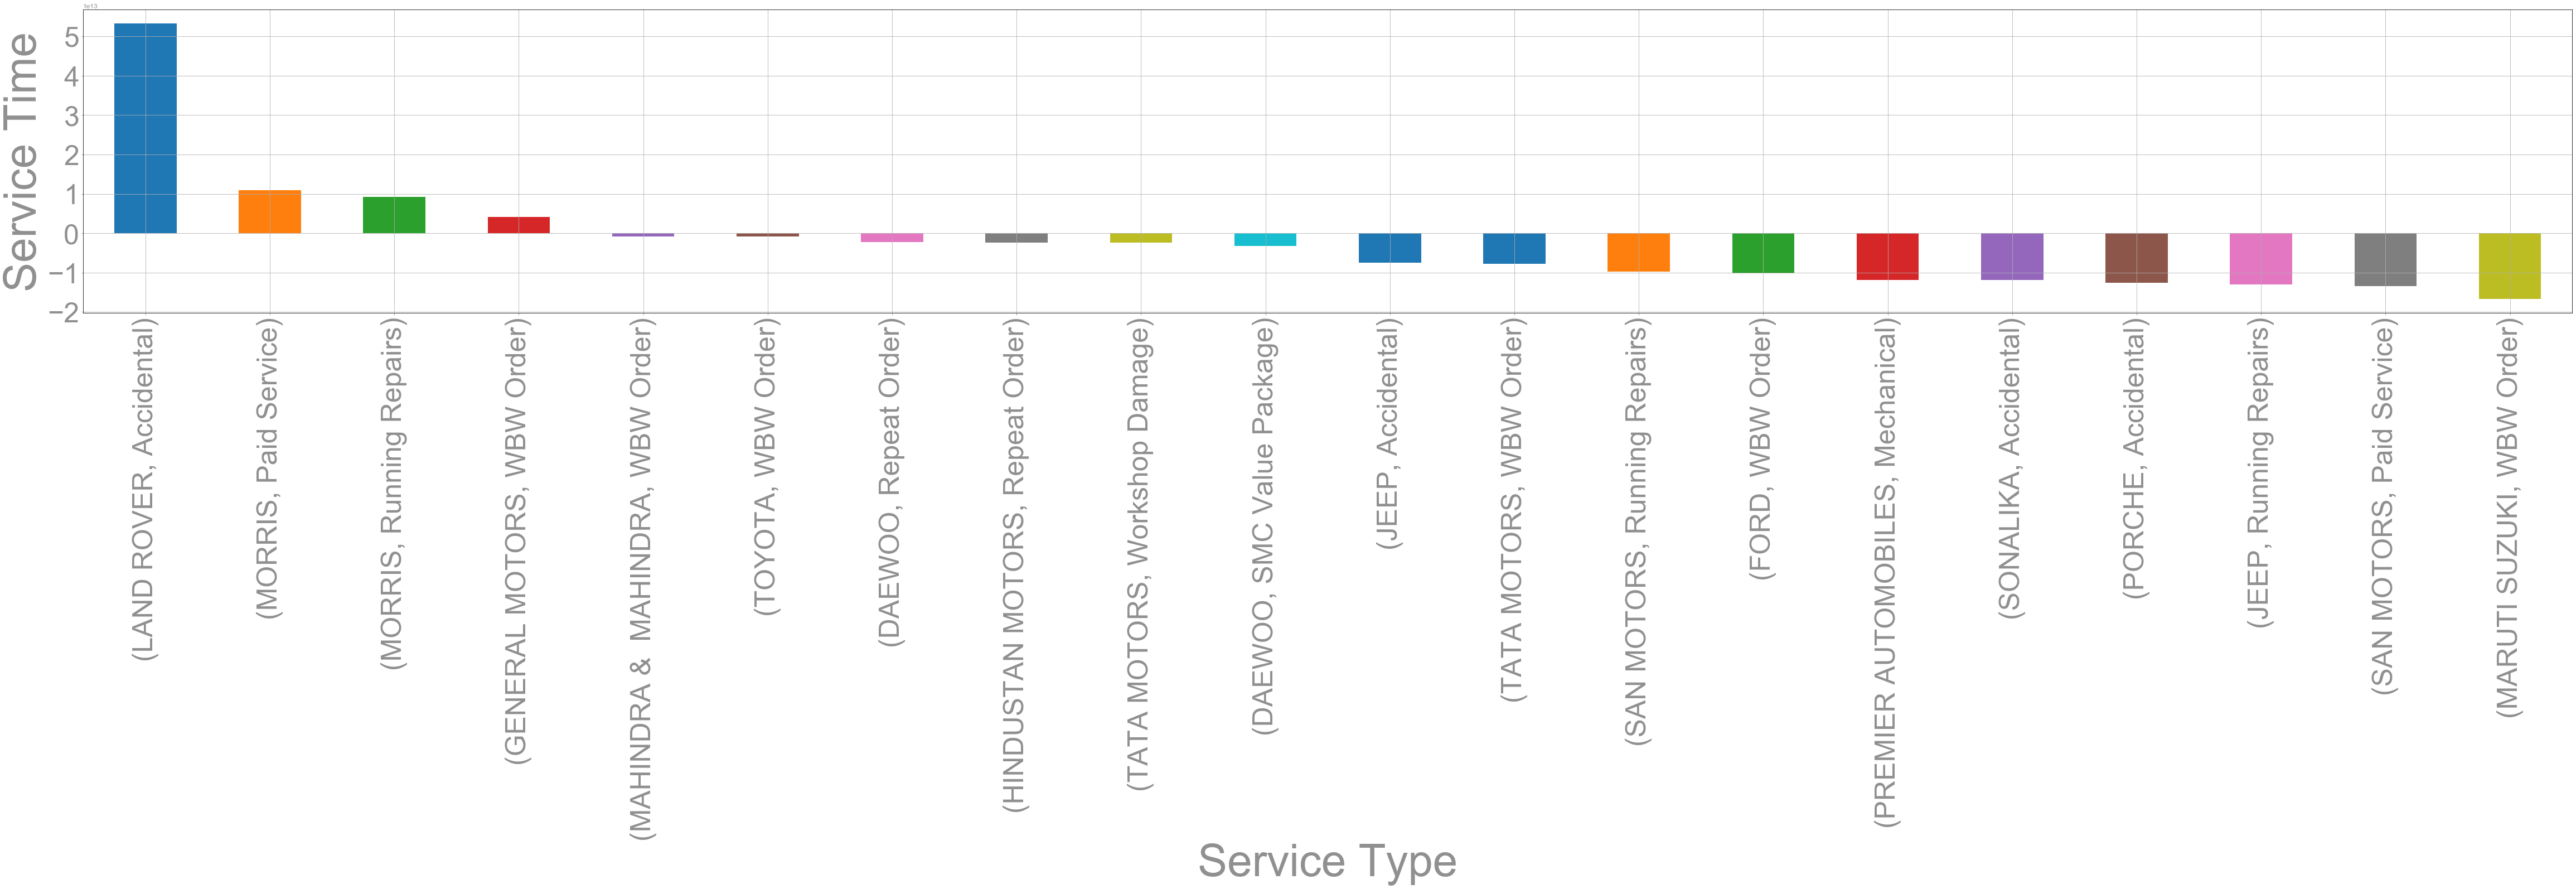

In [95]:
df_invoice.groupby(['Make','Order Type'])['Time_Diff'].sum().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(80,10))
plt.xticks(fontsize =50 , rotation=90)
plt.yticks(fontsize =50 )
plt.xlabel('Service Type',fontsize =80)
plt.ylabel('Service Time',fontsize =80)
plt.grid(True)

In [96]:
cust_data = pd.read_excel("Customer_Data.xlsx")
plant_data = pd.read_excel("Plant Master.xlsx")
field_data = pd.read_excel("Mahindra Field Information.xlsx")

In [97]:
customer_invoice_df = pd.merge(df_invoice,cust_data,left_on='Customer No.',right_on='Customer No.',how='inner')
plant_invoice_df = pd.merge(df_invoice,plant_data,left_on='Plant',right_on='Plant',how='inner')

([<matplotlib.axis.XTick at 0x1826bce0940>,
 <a list of 3 Text xticklabel objects>)

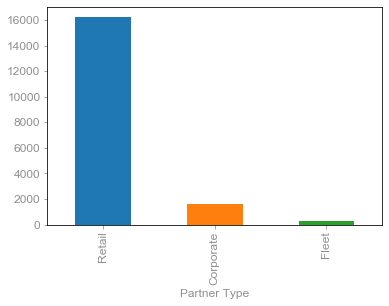

In [98]:
#Customer Type
customer_invoice_df.groupby('Partner Type')['Job Card No'].count().plot(kind='bar')
objects = ('Retail', 'Corporate', 'Fleet')
plt.xticks(range(0,3),objects)

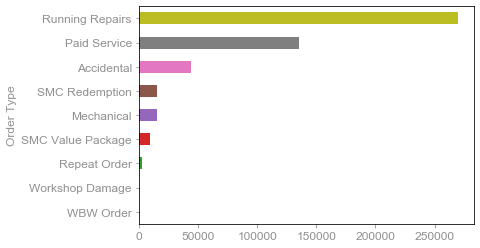

In [99]:
df_invoice.groupby('Order Type')['Job Card No'].count().sort_values(ascending=True).plot(kind='barh')

In [100]:
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

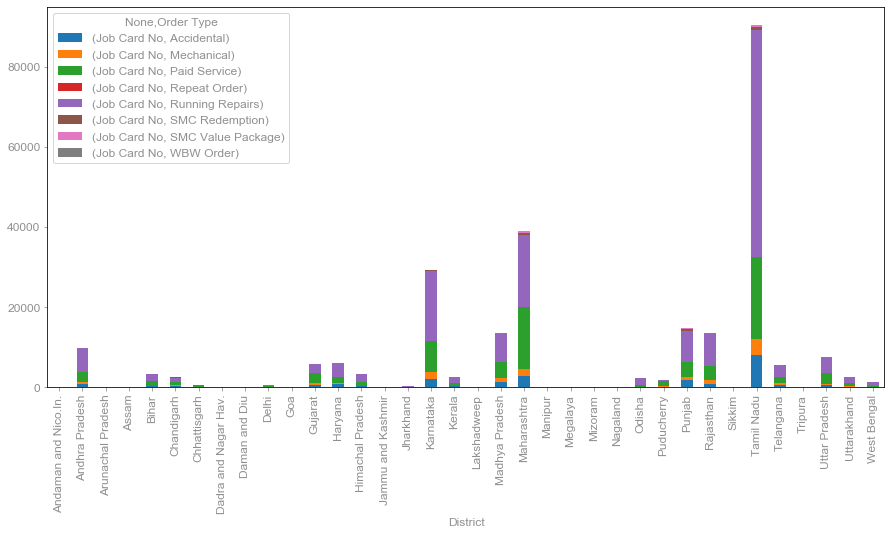

In [101]:
fig, ax = plt.subplots(figsize=(15,7))
plant_invoice_df.groupby(['District','Order Type'])[['Job Card No']].count().sort_values(by=['District','Job Card No'],ascending=False).unstack().plot(kind='bar',stacked=True, ax=ax)

In [102]:
data_maha = df_invoice[df_invoice['District']=='Maharashtra']
data_maha.groupby(['Plant Name1','Order Type'])[['Job Card No']].count().sort_values(by=['Plant Name1','Job Card No'],ascending=False)#.unstack().plot(kind='bar',stacked=True)

Job Card No
Plant Name1                    Order Type                    
YESHWANTPUR - BANGALORE        Running Repairs              5
                               Accidental                   3
                               Mechanical                   1
                               SMC Redemption               1
X444 - SAI AUTO SERVICE        Running Repairs            121
                               Paid Service                18
                               Accidental                   3
X437 - RAHUL AUTO SERVICES PVT Paid Service                11
                               Running Repairs              9
X435 - PAHWA AUTOMOTIVE        Accidental                   1
X405 - NANGAN MOTORS PVT. LTD. Running Repairs              1
X401 - SAI AUTO SERVICES       Paid Service                 2
                               Running Repairs              2
X357 - RAJ AUTOMOBILES         Running Repairs              1
X350 - B.H.MOTORS PRIVATE LIMI Paid Service                 2
X347 - HONEST MOTORS           Paid Service                 3
                               Running Repairs              3
                               Accidental                   2
X329 - SMILE NEW               Running Repairs              1
X328 - PRAMUKH AUTO            Accidental                   1
X327 - B.H.MOTORS PRIVATE LIMI Paid Service                 2
                               Running Repairs              2
X297 - WAI AUTO WORLD LLP      Running Repairs            203
                               Paid Service               154
                               Accidental                  20
X281 - EVERGREEN CAR CARE      Running Repairs              1
X279 - J B CAR CARE            Accidental                   1
                               Mechanical                   1
                               Paid Service                 1
X259 - ROUNAK MOTORS           Running Repairs              1
...                                                       ...
GT ROAD - LUDHIANA             Running Repairs              2
                               Repeat Order                 1
GREATER NOIDA                  Paid Service                 4
                               Running Repairs              3
                               Accidental                   1
GILL ROAD - LUDHIANA           Mechanical                   1
                               Paid Service                 1
                               Running Repairs              1
FARIDABAD 1                    Running Repairs             15
                               Paid Service                 3
                               Accidental                   1
                               Repeat Order                 1
EDAPPALLY - KOCHI              Running Repairs              2
                               Accidental                   1
COIMBATORE                     Running Repairs              2
BELLANDUR - BANGALORE          Running Repairs             13
                               Accidental                   5
                               Paid Service                 3
                               SMC Redemption               3
                               SMC Value Package            2
BALANAGAR                      Paid Service                 4
                               Accidental                   1
ANDHERI                        Paid Service              1389
                               Running Repairs            907
                               Accidental                 318
                               Repeat Order                 7
                               Workshop Damage              1
AMBATTUR - CHENNAI             Accidental                   4
                               Running Repairs              4
                               Paid Service                 3

[400 rows x 1 columns]

In [103]:
df_invoice = pd.read_csv("Final_invoice.csv",low_memory=False)

In [104]:
drop_columns = ['Unnamed: 0','Amt Rcvd From Custom','Amt Rcvd From Ins Co','CGST(14%)','CGST(2.5%)','CGST(6%)','CGST(9%)',
                'IGST(12%)','IGST(18%)','IGST(28%)','IGST(5%)','SGST/UGST(14%)','SGST/UGST(2.5%)','SGST/UGST(6%)',
                'SGST/UGST(9%)','Outstanding Amt','Service Advisor Name','ODN No.','TDS amount','Total CGST','Total GST',
                'Total IGST','Total SGST/UGST']

df_invoice.drop(drop_columns,1,inplace=True)
pd.set_option('display.max_columns',None)

In [105]:
df_invoice['Invoice_DateTime'] = pd.to_datetime(df_invoice['Invoice Date'] + ' ' + df_invoice['Invoice Time'])
df_invoice['JobCard_DateTime'] = pd.to_datetime(df_invoice['JobCard Date'] + ' ' + df_invoice['JobCard Time'])
df_invoice['Service Time']=df_invoice['Invoice_DateTime'].sub(df_invoice['JobCard_DateTime'], axis=0)
df_invoice['Service Hour'] = df_invoice['Service Time'].apply(lambda x:(x.days * 24 + round(x.seconds /3600)))
# df_invoice['Service Hour']

Text(0, 0.5, 'Plants')

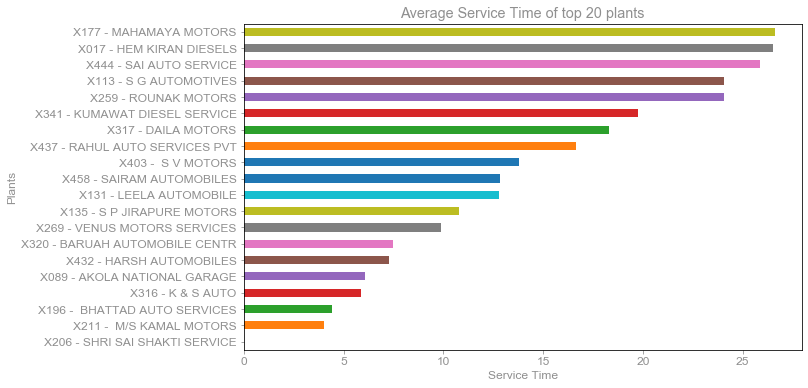

In [106]:
plt.figure(figsize=(10,6))
df_invoice.groupby('Plant Name1')['Service Hour'].mean().sort_values(ascending=True).head(20).plot(kind='barh')
plt.title('Average Service Time of top 20 plants')
plt.xlabel('Service Time')
plt.ylabel('Plants')

Text(0, 0.5, 'States')

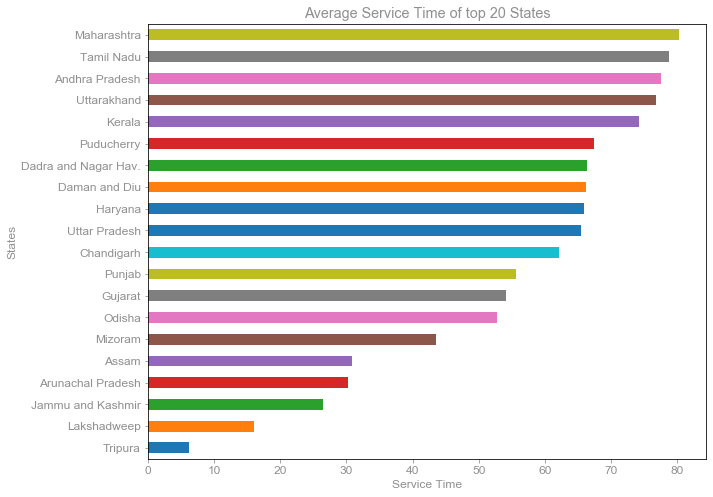

In [107]:
df_invoice['month'] = df_invoice['JobCard_DateTime'].dt.month
df_invoice['year'] = df_invoice['JobCard_DateTime'].dt.year
plt.figure(figsize=(10,8))
df_invoice.groupby('District')['Service Hour'].agg('mean').sort_values(ascending=True).head(20).plot(kind='barh')
plt.title('Average Service Time of top 20 States')
plt.xlabel('Service Time')
plt.ylabel('States')

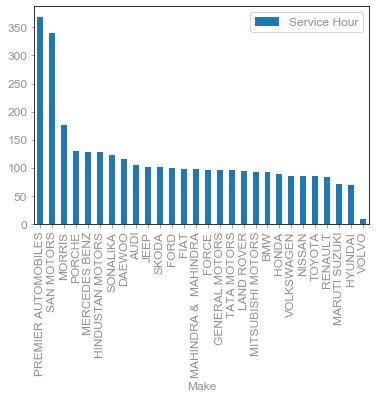

In [108]:
df_invoice.groupby('Make')[['Service Hour']].mean().sort_values(by='Service Hour',ascending=False).plot(kind='bar')

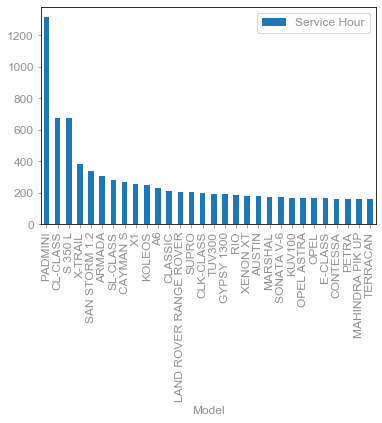

In [109]:
df_invoice.groupby('Model')[['Service Hour']].mean().sort_values(by='Service Hour',ascending=False).head(30).plot(kind='bar')

In [110]:
district_make = df_invoice.groupby(['District','Make'])[['Service Hour']].mean().sort_values(by=['District','Service Hour'],ascending=False)#.plot(kind='bar')
district_make

Service Hour
District             Make                              
West Bengal          SONALIKA                    260.50
                     HINDUSTAN MOTORS            192.75
                     TATA MOTORS                 175.93
                     MAHINDRA &  MAHINDRA        170.61
                     HYUNDAI                     166.33
                     MARUTI SUZUKI               129.44
                     GENERAL MOTORS              116.69
                     HONDA                        96.20
                     TOYOTA                       93.50
                     FIAT                         79.17
                     FORD                         72.33
                     NISSAN                       60.00
                     FORCE                         6.33
                     RENAULT                       0.00
                     SKODA                         0.00
                     VOLKSWAGEN                    0.00
Uttarakhand          SAN MOTORS                 1588.00
                     FIAT                        561.00
                     MITSUBISHI MOTORS           521.00
                     NISSAN                      135.56
                     SKODA                       132.48
                     VOLKSWAGEN                  111.02
                     FORD                         98.22
                     MAHINDRA &  MAHINDRA         83.98
                     TATA MOTORS                  77.03
                     HINDUSTAN MOTORS             75.00
                     MARUTI SUZUKI                67.30
                     TOYOTA                       63.43
                     HYUNDAI                      60.82
                     GENERAL MOTORS               52.86
...                                                 ...
Arunachal Pradesh    GENERAL MOTORS                1.60
Andhra Pradesh       DAEWOO                      170.06
                     MAHINDRA &  MAHINDRA        107.38
                     RENAULT                     104.33
                     MITSUBISHI MOTORS            98.24
                     SKODA                        93.90
                     TATA MOTORS                  92.50
                     FIAT                         86.61
                     HONDA                        86.27
                     FORD                         81.82
                     TOYOTA                       80.13
                     FORCE                        79.58
                     VOLKSWAGEN                   75.79
                     LAND ROVER                   67.00
                     GENERAL MOTORS               63.20
                     HINDUSTAN MOTORS             62.80
                     MARUTI SUZUKI                61.86
                     NISSAN                       60.89
                     HYUNDAI                      55.65
                     MERCEDES BENZ                40.67
                     SAN MOTORS                   37.50
                     AUDI                         35.42
                     BMW                          29.27
                     SONALIKA                     28.40
                     PORCHE                       27.00
                     VOLVO                        10.25
Andaman and Nico.In. TOYOTA                      513.50
                     MAHINDRA &  MAHINDRA        151.33
                     FIAT                        124.00
                     MARUTI SUZUKI                 0.00

[534 rows x 1 columns]

In [111]:
df_invoice.groupby(['Insurance Company','Make'])[['Job Card No']].count().sort_values(by=['Insurance Company','Job Card No'], ascending=False)

Job Card No
Insurance Company                   Make                             
UNIVERSAL SOMPO GENERAL INSURANCE C MARUTI SUZUKI                 246
                                    MAHINDRA &  MAHINDRA          151
                                    HYUNDAI                       108
                                    TATA MOTORS                    99
                                    GENERAL MOTORS                 45
                                    HONDA                          38
                                    FORD                           34
                                    TOYOTA                         33
                                    VOLKSWAGEN                     23
                                    NISSAN                         21
                                    SKODA                          18
                                    MITSUBISHI MOTORS              10
                                    FIAT                            7
                                    RENAULT                         7
                                    FORCE                           1
                                    MERCEDES BENZ                   1
                                    PORCHE                          1
                                    PREMIER AUTOMOBILES             1
UNITED INDIA INSURANCE CO. LTD      MARUTI SUZUKI                 534
                                    MAHINDRA &  MAHINDRA          486
                                    HYUNDAI                       341
                                    TATA MOTORS                   325
                                    GENERAL MOTORS                225
                                    TOYOTA                        153
                                    FORD                          101
                                    HONDA                          53
                                    VOLKSWAGEN                     48
                                    RENAULT                        45
                                    SKODA                          37
                                    NISSAN                         24
...                                                               ...
BHARTI AXA GENRERAL INSURANCE       MAHINDRA &  MAHINDRA          224
                                    TATA MOTORS                   127
                                    GENERAL MOTORS                 67
                                    FORD                           59
                                    TOYOTA                         46
                                    HONDA                          37
                                    VOLKSWAGEN                     37
                                    RENAULT                        34
                                    SKODA                          26
                                    FIAT                           13
                                    NISSAN                         11
                                    MITSUBISHI MOTORS               6
                                    MERCEDES BENZ                   3
                                    BMW                             1
BAJAJ ALLIANZE GENERAL INSURANCE CO HYUNDAI                       232
                                    MARUTI SUZUKI                 219
                                    MAHINDRA &  MAHINDRA          130
                                    FORD                           67
                                    TATA MOTORS                    59
                                    GENERAL MOTORS                 53
                                    VOLKSWAGEN                     49
                                    HONDA                          46
                                    TOYOTA                         39
                                    SKODA                          32
                                    FIAT                           1

TypeError: 'AxesSubplot' object is not subscriptable

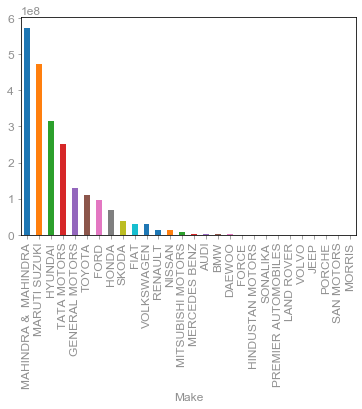

In [119]:
insurance = df_invoice.groupby('Make')['Total Amt Wtd Tax.'].sum().sort_values(ascending=False).plot(kind='bar')[df_invoice['Insurance Company'].notnull()]
insurance.groupby('Make')['Job Card No'].count().sort_values(ascending=False).plot(kind='bar')

In [126]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()

numeric_columns = numeric_features(df_invoice)
print("Numeric Features:")
print(numeric_columns)
print("===="*20)

# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(df_invoice)
print("Categorical Features:")
print(categorical_columns)

# Function to check the datatypes of all the columns:
def check_datatypes(dataset):
    return dataset.dtypes


check_datatypes(df_invoice)

Numeric Features:
   Invoice No  Job Card No  KMs Reading  Labour Total  Misc Total  OSL Total  \
0  7005200002       168303        49317       1203.14        0.00     500.06   
1  7005200003       173997        78584        804.26      197.03       0.00   
2  7005200004       173889        33985        180.19        0.00       0.00   
3  7005200005       174158        78584          0.00        0.00       0.00   
4  7005200006       173860        50057       1202.97      100.00     499.99   

   Parts Total  Pin code  Recovrbl Exp  Total Amt Wtd Tax.  Total Value  \
0      2348.75    400601          0.00             4051.95      4051.95   
1         0.00    400603          0.00             1001.29      1001.29   
2        52.95    400607          0.00              233.14       233.14   
3         0.00    400603          0.00                0.00         0.00   
4       944.16    400603          0.00             2747.12      2747.12   

      Service Time  Service Hour  month  year  
0 

Area / Locality                 object
CITY                            object
Cash /Cashless Type             object
Claim No.                       object
Cust Type                       object
Customer No.                    object
District                        object
Expiry Date                     object
Gate Pass Date                  object
Gate Pass Time                  object
Insurance Company               object
Invoice Date                    object
Invoice No                       int64
Invoice Time                    object
Job Card No                      int64
JobCard Date                    object
JobCard Time                    object
KMs Reading                      int64
Labour Total                   float64
Make                            object
Misc Total                     float64
Model                           object
OSL Total                      float64
Order Type                      object
Parts Total                    float64
Pin code                 

In [128]:
df_invoice.isnull().sum()

Area / Locality         23890
CITY                        1
Cash /Cashless Type    464894
Claim No.              487510
Cust Type                   0
Customer No.                0
District                    0
Expiry Date            470083
Gate Pass Date         451399
Gate Pass Time              0
Insurance Company      468723
Invoice Date                0
Invoice No                  0
Invoice Time                0
Job Card No                 0
JobCard Date                0
JobCard Time                0
KMs Reading                 0
Labour Total                0
Make                        0
Misc Total                  0
Model                    1525
OSL Total                   0
Order Type                  0
Parts Total                 0
Pin code                    0
Plant                       0
Plant Name1                 0
Policy no.             475432
Print Status                0
Recovrbl Exp                0
Regn No                    16
Technician Name        236834
Total Amt 

In [129]:
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count() * 100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
    
    
missing_data = missing_data(df_invoice)
print(missing_data)

                      Total  Percent
Claim No.            487510    99.02
Policy no.           475432    96.57
Expiry Date          470083    95.48
Insurance Company    468723    95.21
Cash /Cashless Type  464894    94.43
Gate Pass Date       451399    91.69
Technician Name      236834    48.11
Total Value          197286    40.07
Area / Locality       23890     4.85
Model                  1525     0.31
Regn No                  16     0.00
CITY                      1     0.00
District                  0     0.00
KMs Reading               0     0.00
Customer No.              0     0.00
Cust Type                 0     0.00
Gate Pass Time            0     0.00
Invoice Date              0     0.00
Invoice No                0     0.00
Invoice Time              0     0.00
Job Card No               0     0.00
JobCard Date              0     0.00
JobCard Time              0     0.00
year                      0     0.00
Labour Total              0     0.00
Make                      0     0.00
S

In [132]:
df_invoice[df_invoice['Order Type']=='Workshop Damage']
df_invoice['Service Hour']

0         477
1          20
2          24
3           1
4          25
5          21
6          24
7           0
8           3
9           5
10          3
11          7
12          6
13          5
14          2
15          8
16         31
17          6
18         27
19          6
20          8
21         25
22          1
23         25
24         52
25          2
26         28
27          4
28          5
29          7
         ... 
492284      4
492285      3
492286      1
492287      4
492288      5
492289      5
492290      2
492291      7
492292      3
492293      3
492294      3
492295      3
492296      3
492297      3
492298      3
492299      3
492300      4
492301      2
492302      5
492303      5
492304      5
492305      5
492306      5
492307      6
492308      5
492309      6
492310      6
492311      7
492312      3
492313      0
Name: Service Hour, Length: 492314, dtype: int64